In [ ]:
#Importing packages
import numpy as np
import pandas as pd

# Importing matplotlib and seaborn for graphs
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!wget = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094"

--2023-07-04 17:23:48--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2023-07-04 17:23:48--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.65.40.103, 18.65.40.33, 18.65.40.200, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.65.40.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv?1641285094.4’

walmart_data.csv?16 100%[===================>]  21.96M  --.-KB/s    in 0.09s   

2023-07-04 17:23:48 (242 MB/s) - ‘walmart_data.csv?1641285094.4’ saved [23027994/23027994]

FINISHED --2023-07-04 17:23:48--
Total wall clock time: 0.1s
Downloaded: 1 files, 22M in 0.09s (242 MB/s)


# Exploratory Data Analysis

In [ ]:
df = retail_data = pd.read_csv("walmart_data.csv?1641285094")

In [ ]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# converting data types to category
cols = ['City_Category','Product_Category']
for col_name in cols:
    retail_data[col_name] = retail_data[col_name].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  object  
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(2), int64(4), object(4)
memory usage: 34.6+ MB


# Checking Shape and Column names

In [ ]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 550068
Number of columns: 10


In [ ]:
retail_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

# Missing Data Analysis

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

No missing data was found

# Unique value count

In [ ]:
retail_data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

The total number of records exceeds five million but the UserIDs are only 5891, meaning customers have visited multiple times in order to buy products.

In [ ]:
retail_data.groupby(['Gender'])['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [ ]:
print("Females are ", (1666/5891)*100,"%")
print("Males are ", (4225/5891)*100,"%")

Females are  28.28042777117637 %
Males are  71.71957222882362 %


The percentage of women customers is only 28%
    
Around 72% of customers are male

# Unique values (names) are checked for each Features

In [ ]:
colname = ['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category','Occupation']
for col in colname:
    print("\nUnique values of ",col," are : ",list(retail_data[col].unique()))



Unique values of  Gender  are :  ['F', 'M']

Unique values of  Age  are :  ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

Unique values of  City_Category  are :  ['A', 'C', 'B']

Unique values of  Stay_In_Current_City_Years  are :  ['2', '4+', '3', '1', '0']

Unique values of  Marital_Status  are :  [0, 1]

Unique values of  Product_Category  are :  [3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 16, 18, 10, 17, 9, 20, 19]

Unique values of  Occupation  are :  [10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11, 8, 19, 2, 18, 5, 14, 13, 6]


# Basic Statistics Analysis - count, min, max, and mean


In [ ]:
retail_data.describe().T

count          mean          std        min        25%  \
User_ID         550068.0  1.003029e+06  1727.591586  1000001.0  1001516.0   
Occupation      550068.0  8.076707e+00     6.522660        0.0        2.0   
Marital_Status  550068.0  4.096530e-01     0.491770        0.0        0.0   
Purchase        550068.0  9.263969e+03  5023.065394       12.0     5823.0   

                      50%        75%        max  
User_ID         1003077.0  1004478.0  1006040.0  
Occupation            7.0       14.0       20.0  
Marital_Status        0.0        1.0        1.0  
Purchase           8047.0    12054.0    23961.0

In [ ]:
retail_data.describe(include=['object','category']).T

count unique        top    freq
Product_ID                  550068   3631  P00265242    1880
Gender                      550068      2          M  414259
Age                         550068      7      26-35  219587
City_Category               550068      3          B  231173
Stay_In_Current_City_Years  550068      5          1  193821
Product_Category            550068     20          5  150933

In [ ]:
retail_data.groupby(['Gender'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

In [ ]:
retail_data.groupby(['Marital_Status'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
Marital_Status                                                             
0               324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   
1               225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   

                    75%      max  
Marital_Status                    
0               12061.0  23961.0  
1               12042.0  23961.0

In [ ]:
retail_data.groupby(['Age'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

In [ ]:
retail_data.groupby(['City_Category'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
City_Category                                                             
A              147720.0  8911.939216  4892.115238  12.0  5403.0  7931.0   
B              231173.0  9151.300563  4955.496566  12.0  5460.0  8005.0   
C              171175.0  9719.920993  5189.465121  12.0  6031.5  8585.0   

                   75%      max  
City_Category                    
A              11786.0  23961.0  
B              11986.0  23960.0  
C              13197.0  23961.0

In [ ]:
retail_data.groupby(['City_Category'])['User_ID'].nunique()

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

    There are more single people than married people.
    
    Most mall customers are between the ages of 26 and 35.
    
    The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.
    
    Male customers tend to spend more than female customers, as the mean is higher for male customers.
    
    The majority of users come from City Category C, but more people from City Category B tend to purchase, which suggests the same users visit the mall multiple times in City Category B.

# Correlation Analysis


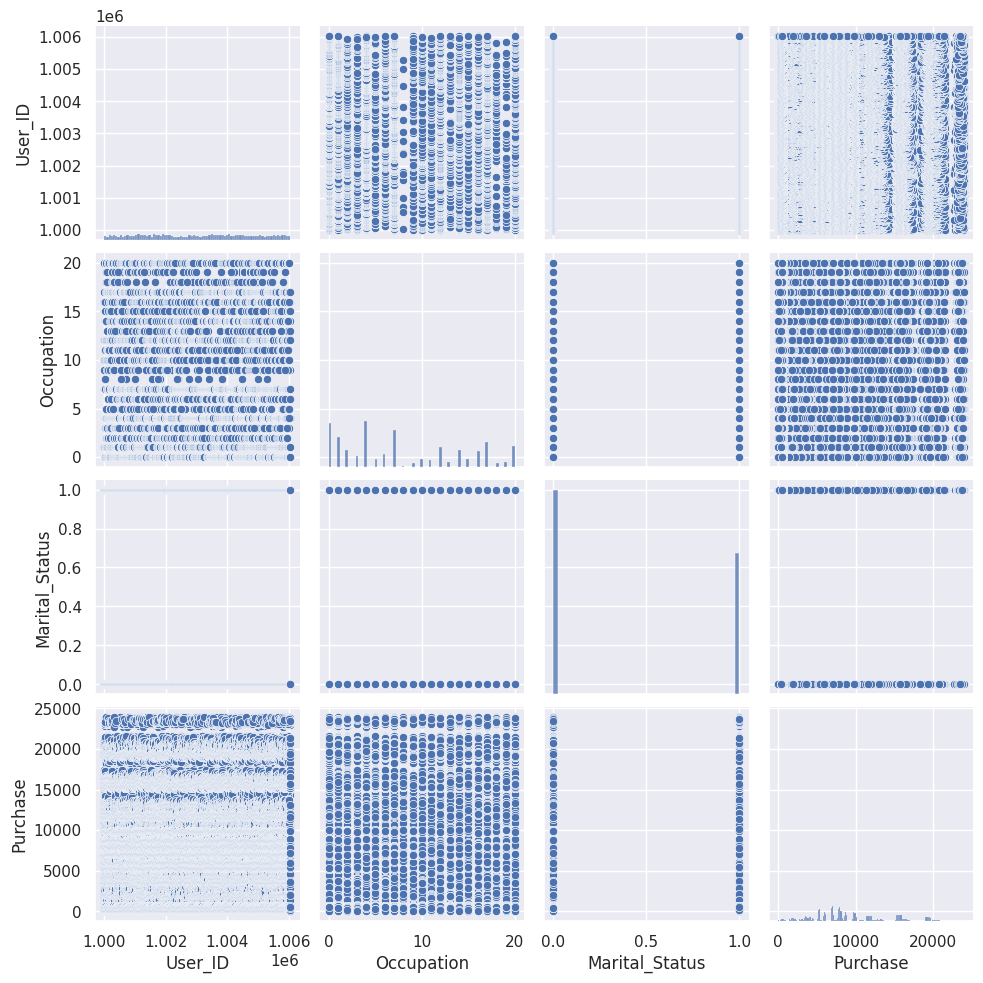

In [ ]:
sns.pairplot(retail_data)

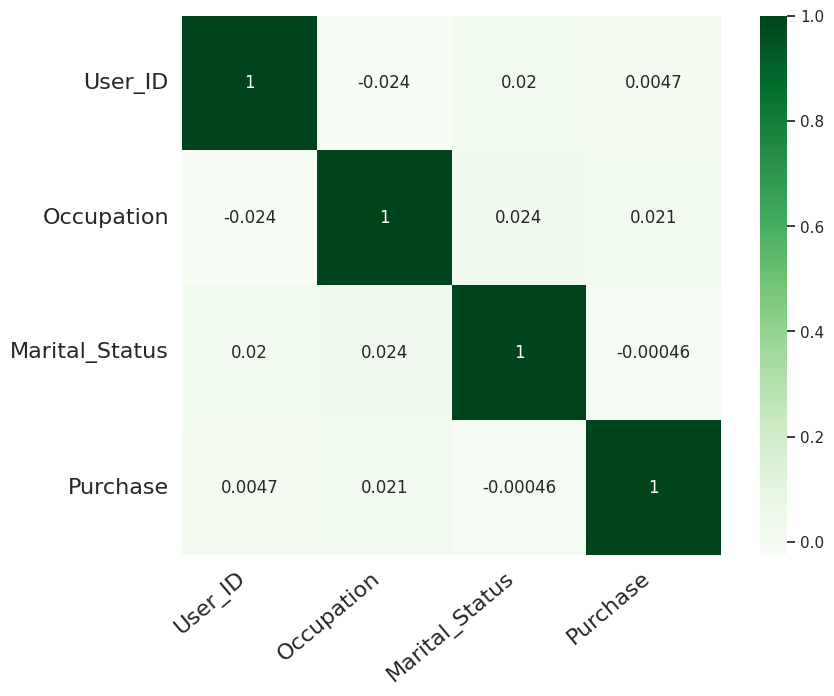

In [ ]:
plt.figure(figsize = (10, 7))
ax = sns.heatmap(retail_data.corr(),
            annot=True,cmap='Greens',square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,fontsize=16 ,
    horizontalalignment='right')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,fontsize=16 ,
    horizontalalignment='right')

plt.show()

    Mostly features are categorical and not much correlation can be observed from above graphs.

# Univariante Analysis


Text(0.5, 12.44444444444443, 'Age')

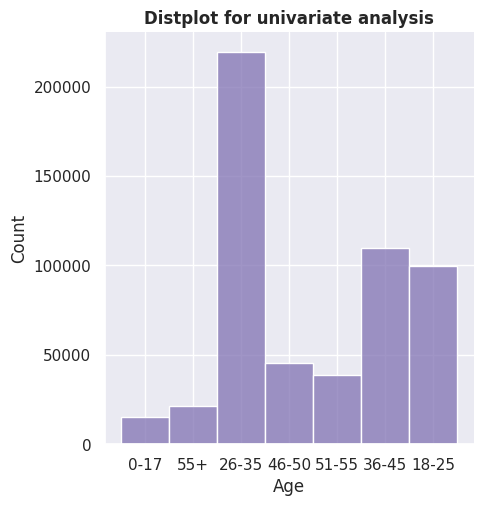

In [ ]:
sns.displot(retail_data["Age"],color='m')
plt.title("Distplot for univariate analysis", fontweight="bold",fontsize=12)
plt.xlabel('Age', fontsize=12,)


**Numerical Variables - Outlier detection**

Text(0.5, 0, 'Purchase')

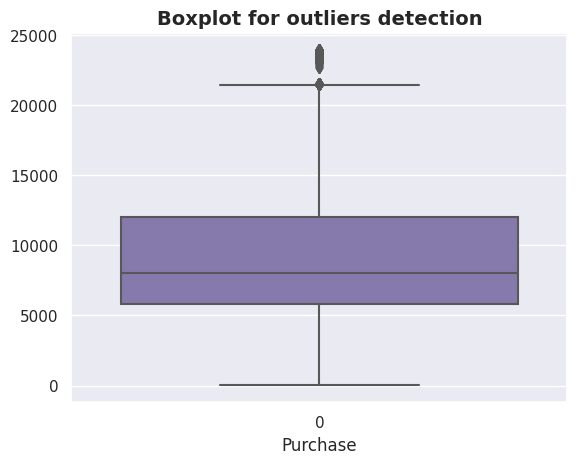

In [ ]:
sns.boxplot(retail_data["Purchase"],color='m')
plt.title("Boxplot for outliers detection", fontweight="bold",fontsize=14)
plt.xlabel('Purchase', fontsize=12,)


    Majority of Customers purchase within the 5,000 - 20,000 range, with outliers

**Categorical variable Uni-variante Analysis**

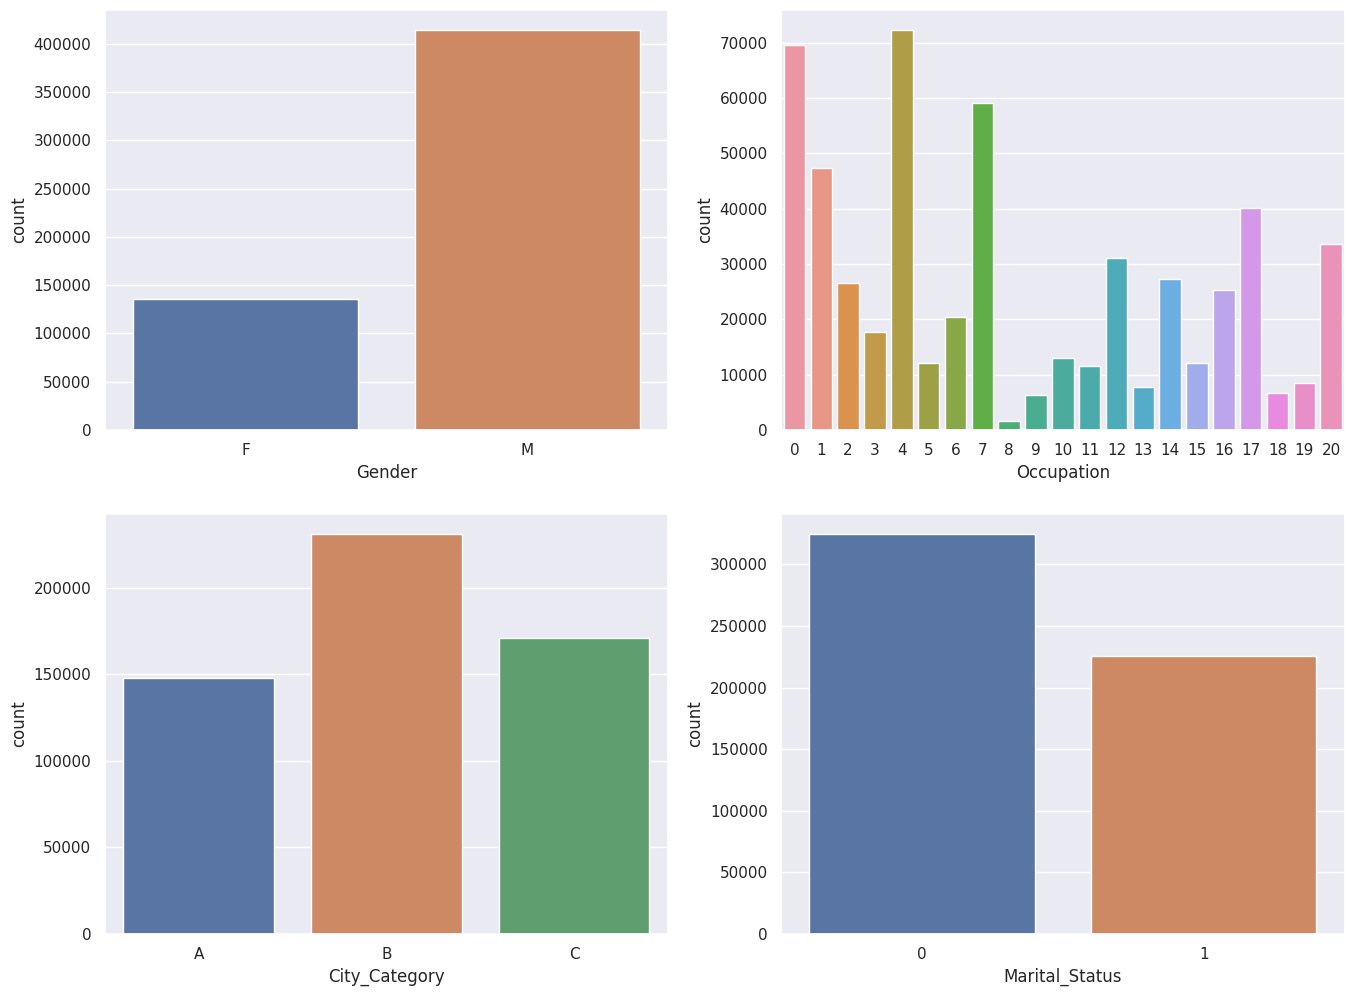

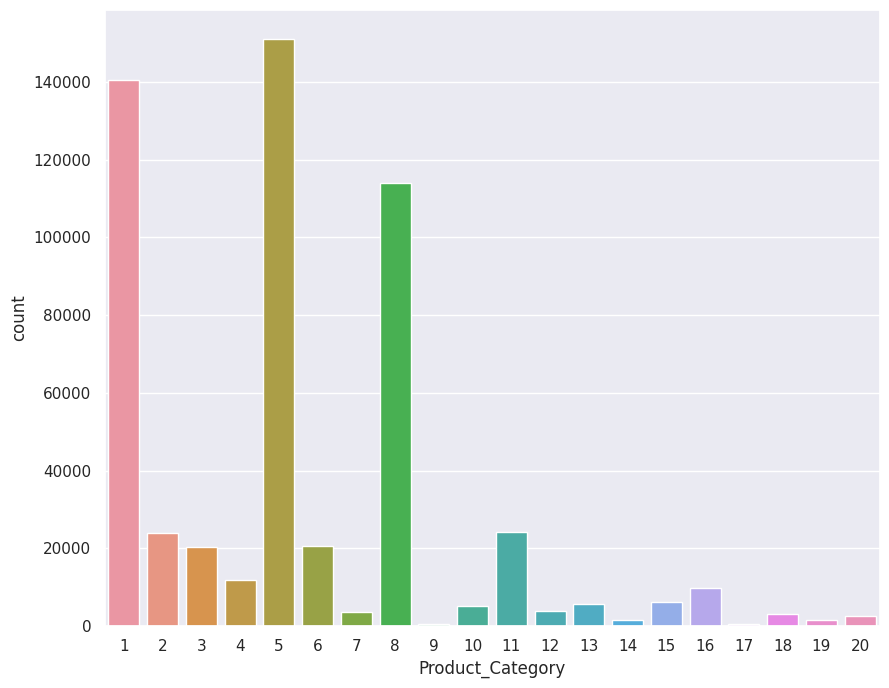

In [ ]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

**Observations**
* Most of the users are Male
* There are 20 different types of Occupation and Product_Category
* More users belong to B City_Category
* More users are Single as compare to Married
* Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

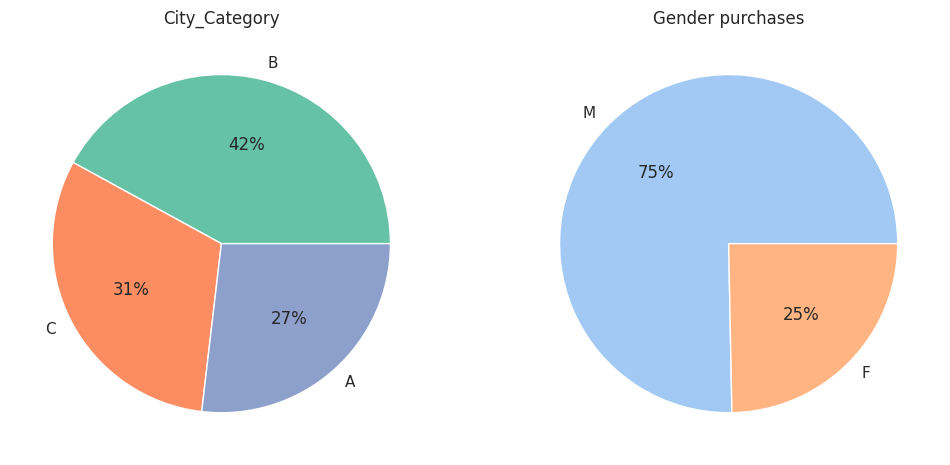

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['City_Category'].value_counts(normalize=True)*100
palette_color = sns.color_palette("Set2")
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("City_Category")


data = df['Gender'].value_counts(normalize=True)*100
palette_color = sns.color_palette('pastel')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Gender purchases")


plt.show()


    Most of the purchases made by the users aged between 26-35 age group follwed by 36-45 age group
    
    
    City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.

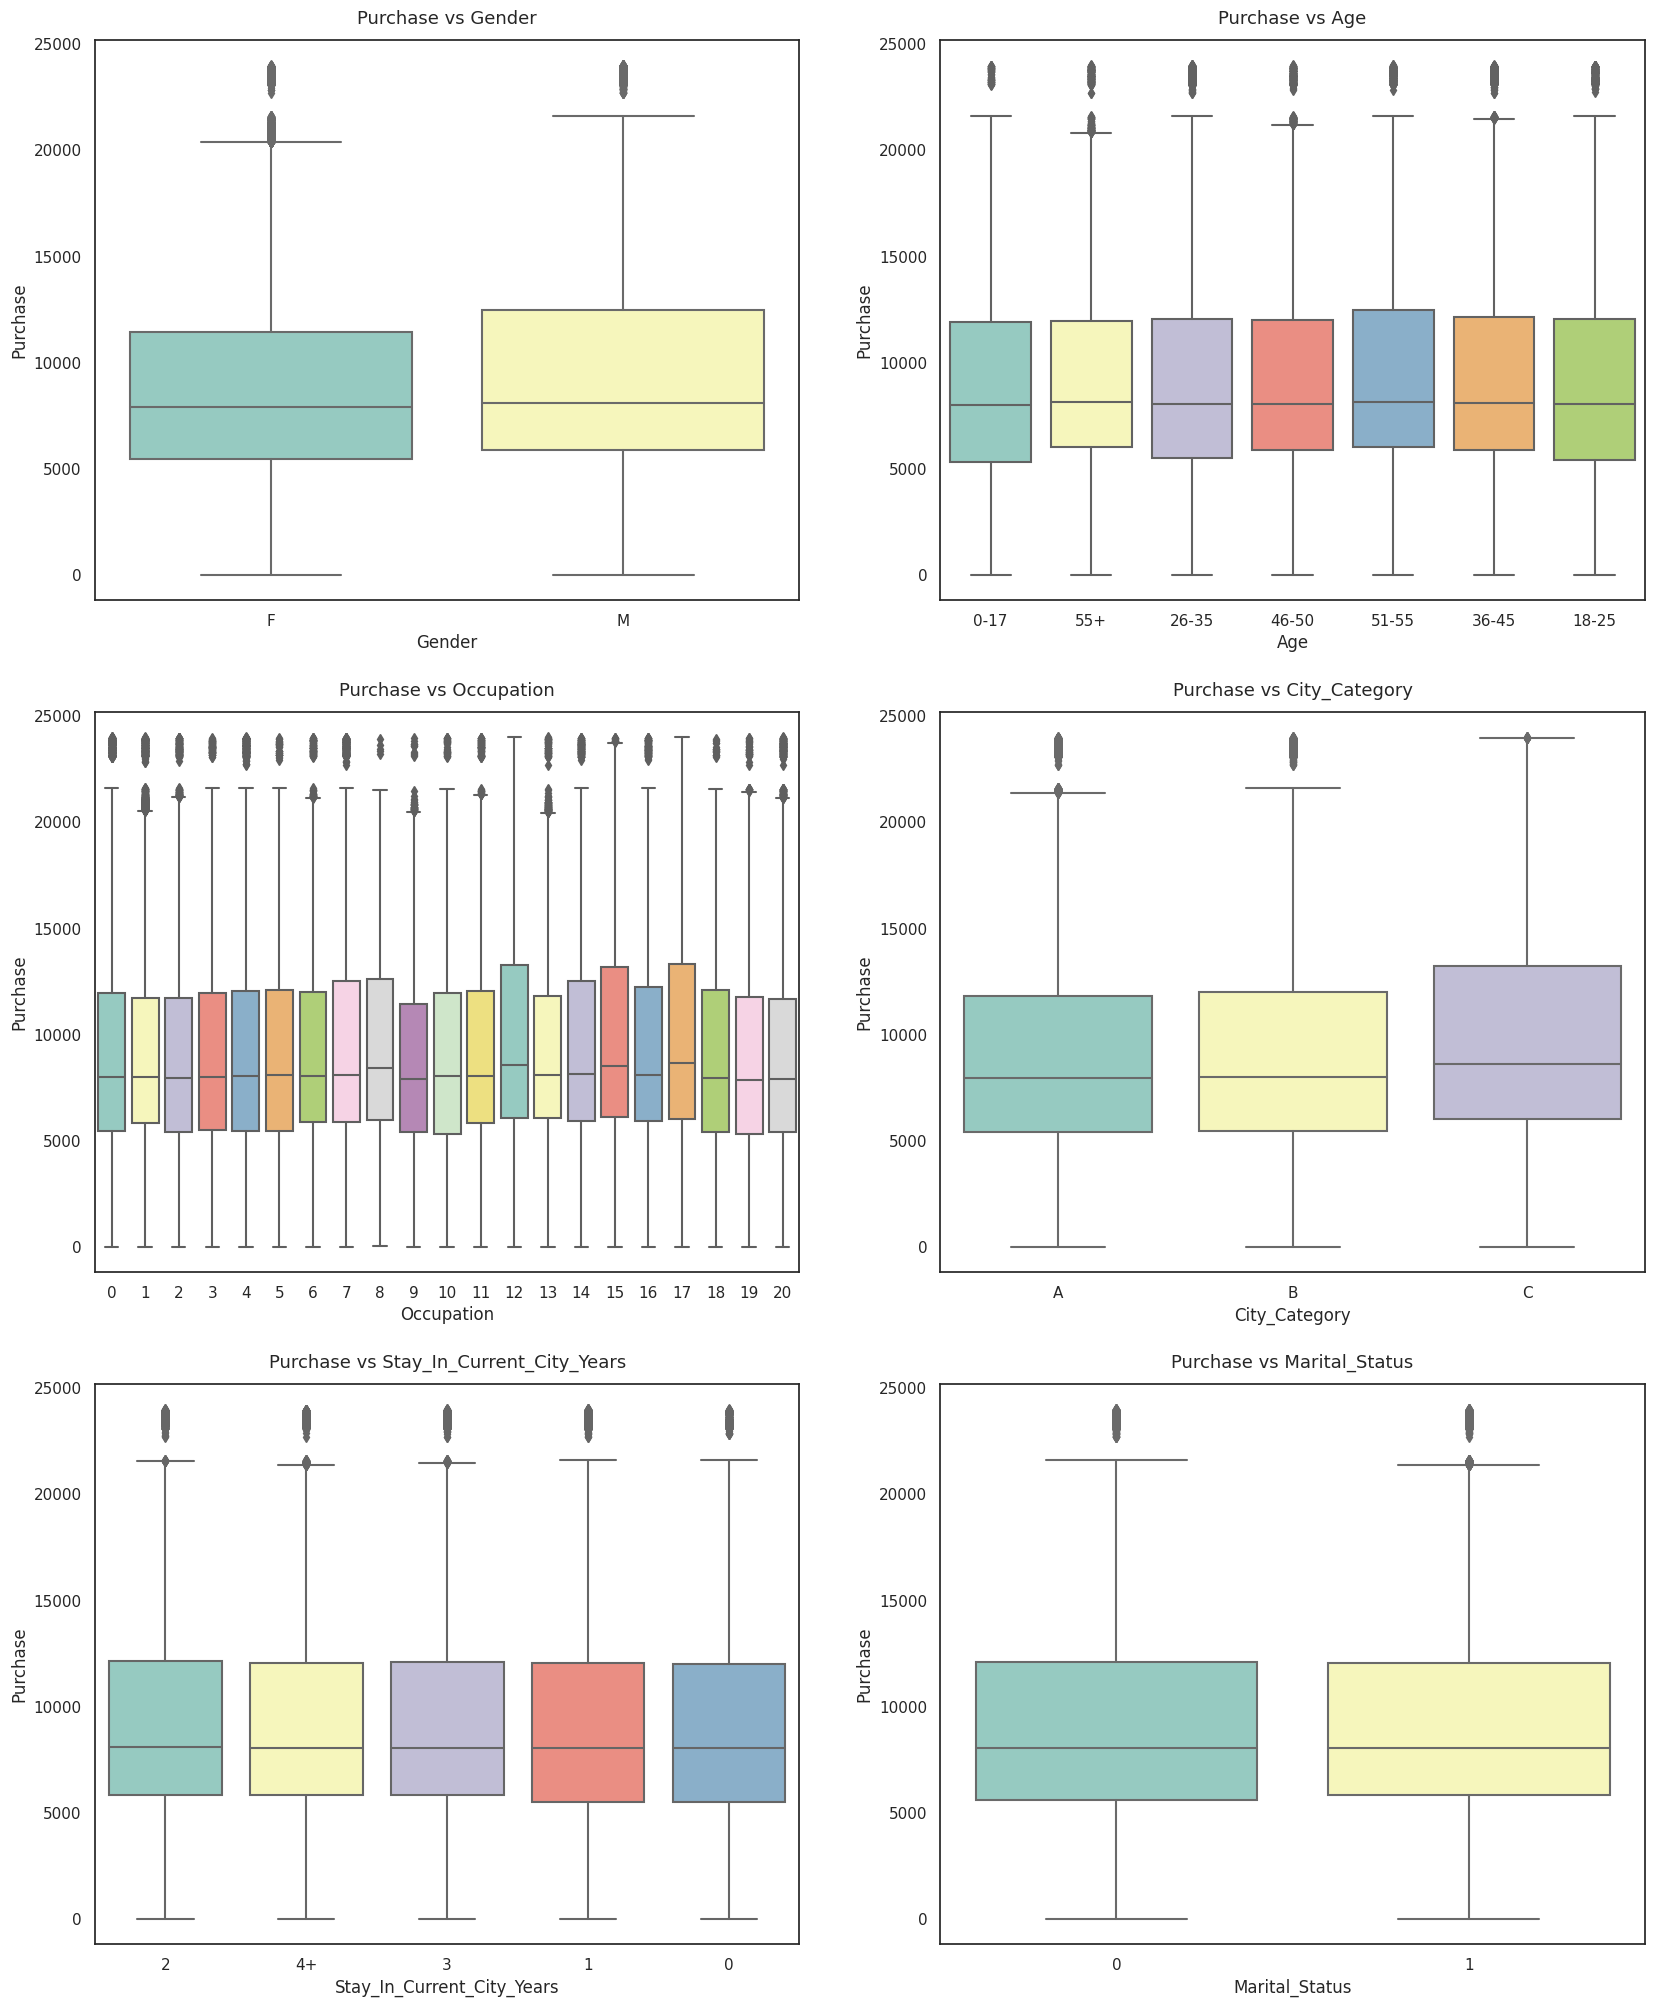

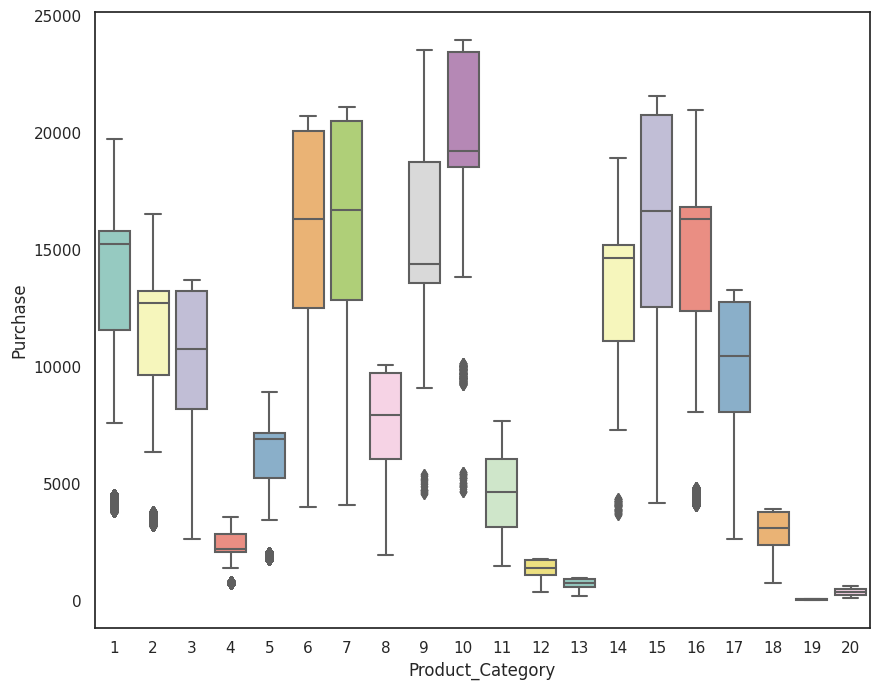

In [ ]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()


    Purchases are high in city category C
    
    Purchase is almost the same for all age groups
    

# Male vs Female exploration

In [ ]:
print(retail_data_v1.groupby(['Gender','City_Category'])['User_ID'].count())

Gender  City_Category
F       A                 35704
        B                 57796
        C                 42309
M       A                112016
        B                173377
        C                128866
Name: User_ID, dtype: int64


<Figure size 2500x1000 with 0 Axes>

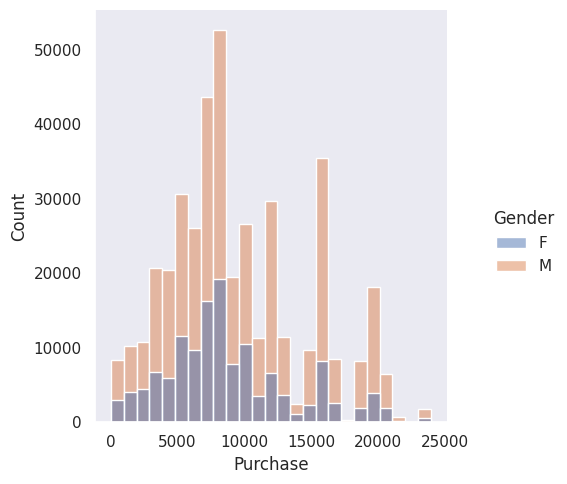

In [ ]:
fig = plt.figure(figsize=(25,10))
fig.set_facecolor("lightgrey")
sns.set(style='dark')
sns.displot(x= 'Purchase',data=retail_data_v1,hue='Gender',bins=25)
plt.show()

**Inference**

    The amount of money spent by women is less than that spent by men

In [ ]:
retail_data_v1.sample(500,replace=True).groupby(['Gender'])['Purchase'].describe()

count      mean          std    min     25%     50%      75%      max
Gender                                                                       
F       125.0  9332.280  5258.223703  364.0  5390.0  7994.0  12751.0  20639.0
M       375.0  9888.224  5401.110233  122.0  5988.5  8278.0  15231.0  23853.0


**Inference**
  
    Even the sample mean shows that males spend more than females.

    Maximum purchase value is almost same for both the gender



In [ ]:
retail_data_v1.groupby(['Gender'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

In [ ]:
retail_data_v1.shape

(550068, 10)

**Inference**  
      
    Given the sample size of 5.4 Million data for customer purhase history with 1.3M Females and 4.1 Males

In [ ]:
retail_data_smp_male = retail_data_v1[retail_data_v1['Gender'] == 'M']['Purchase']
retail_data_smp_female = retail_data_v1[retail_data_v1['Gender'] == 'F']['Purchase']

In [ ]:
print("Male Customers : ",retail_data_smp_male.shape[0])
print("Female Customers : ",retail_data_smp_female.shape[0])

Male Customers :  414259
Female Customers :  135809


# bootstrap

In [ ]:
def bootstrapping(sample1,sample2,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):

    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        smp1_n = np.random.choice(sample1, size = smp_siz,replace=True)
        smp2_n = np.random.choice(sample2, size = smp_siz,replace=True)
        smp1_means_m[i] = np.mean(smp1_n)
        smp2_means_m[i] = np.mean(smp2_n)

    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = statistics.stdev(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)

    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = statistics.stdev(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)

    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=smp1_means_m,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,color='#e5ae38',fill=True,linewidth=2)

    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))

    plt.title(f"Sample Size: {smp_siz}, Male Avg: {np.round(mean1, 2)}, Male SME: {np.round(sem1,2)},Female Avg:{np.round(mean2, 2)}, Female SME: {np.round(sem2,2)}",
              fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()

    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

In [ ]:
def bootstrapping_m_vs_um(sample1,sample2,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):

    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        smp1_n = np.random.choice(sample1, size = smp_siz,replace=True)
        smp2_n = np.random.choice(sample2, size = smp_siz,replace=True)
        smp1_means_m[i] = np.mean(smp1_n)
        smp2_means_m[i] = np.mean(smp2_n)

#     std_dev1 = np.std(sample1)
#     std_err1 = np.std(sample1,ddof=1)/np.sqrt(smp_siz)
#     std_dev2 = np.std(sample2)
#     std_err2 = np.std(sample2,ddof=1)/np.sqrt(smp_siz)

    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = statistics.stdev(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)

    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = statistics.stdev(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)

#     print(smp_siz,std_dev1,std_err1,sem1)
#     print(smp_siz,std_dev2,std_err2,sem2)

    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=smp1_means_m,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,color='#e5ae38',fill=True,linewidth=2)

    label_mean1=("μ (Married) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Unmarried):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))

    plt.title(f"Sample Size: {smp_siz}, Married Avg: {np.round(mean1, 2)}, Married SME: {np.round(sem1,2)},Unmarried Avg:{np.round(mean2, 2)}, Unmarried SME: {np.round(sem2,2)}",
              fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()

    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

In [ ]:
def bootstrapping_age(sample,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):

    smp_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp_n = np.empty(smp_siz)
        smp_n = np.random.choice(sample, size = smp_siz,replace=True)
        smp_means_m[i] = np.mean(smp_n)

    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean  = np.mean(smp_means_m)
    sigma = statistics.stdev(smp_means_m)
    sem   = stats.sem(smp_means_m)

    lower_limit = mean - (z_critical * sigma)
    upper_limit = mean + (z_critical * sigma)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=smp_means_m,color="#7A68A6",fill=True,linewidth=2)

    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))

    plt.title(f"Sample Size: {smp_siz},Mean:{np.round(mean,2)}, SME:{np.round(sem,2)}",fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()

    return smp_means_m ,np.round(lower_limit,2),np.round(upper_limit,2)

# Central limit Theorem

## CLT Analysis for mean purchase with confidence 90% - Based on Gender
    
>Analysis of the true mean of purchase values by gender with a 90% confidence

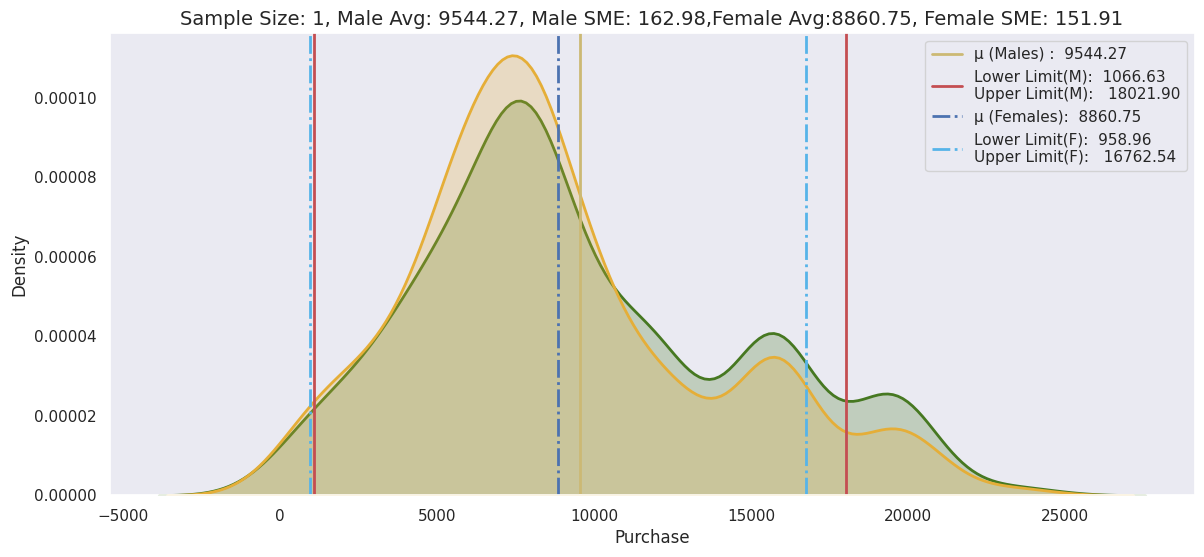

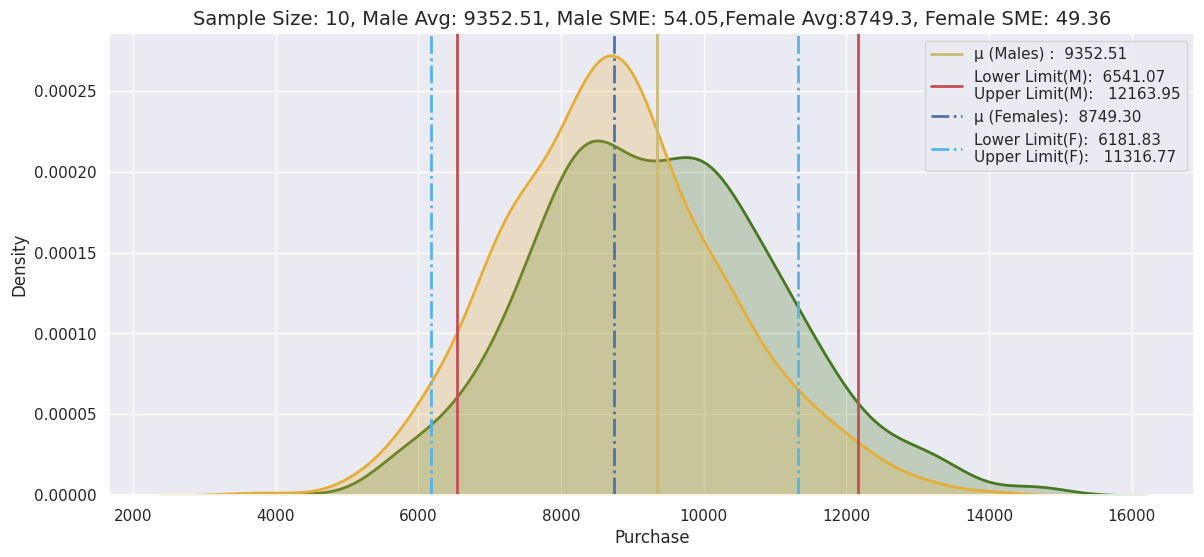

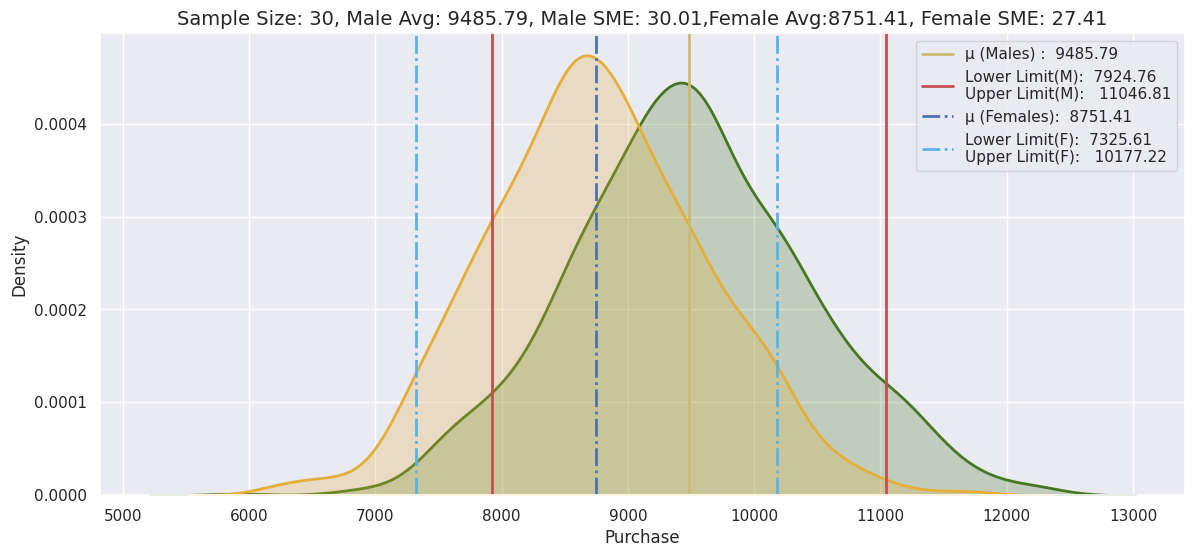

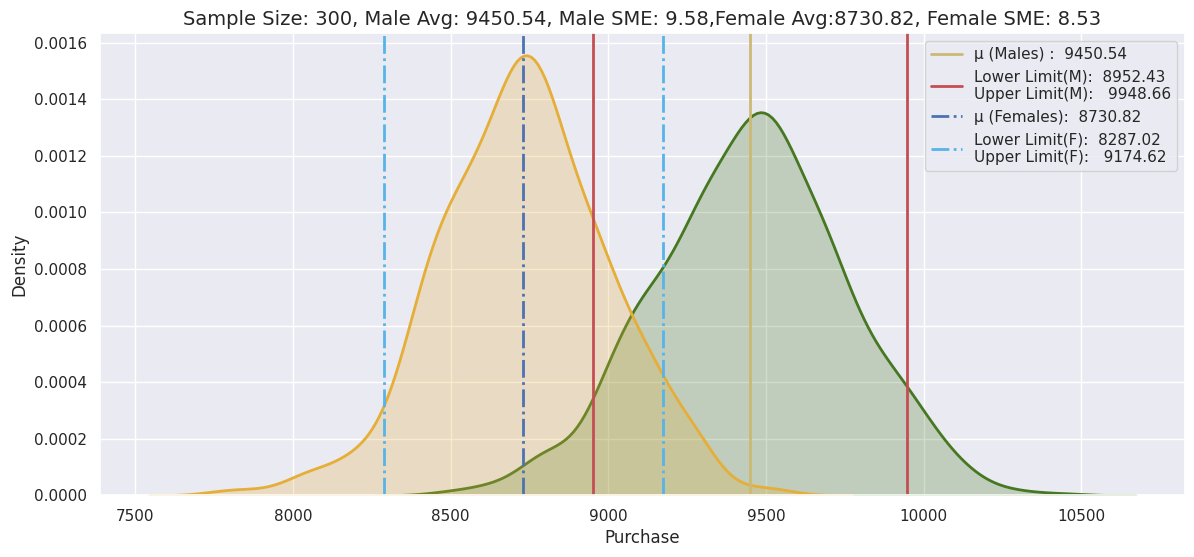

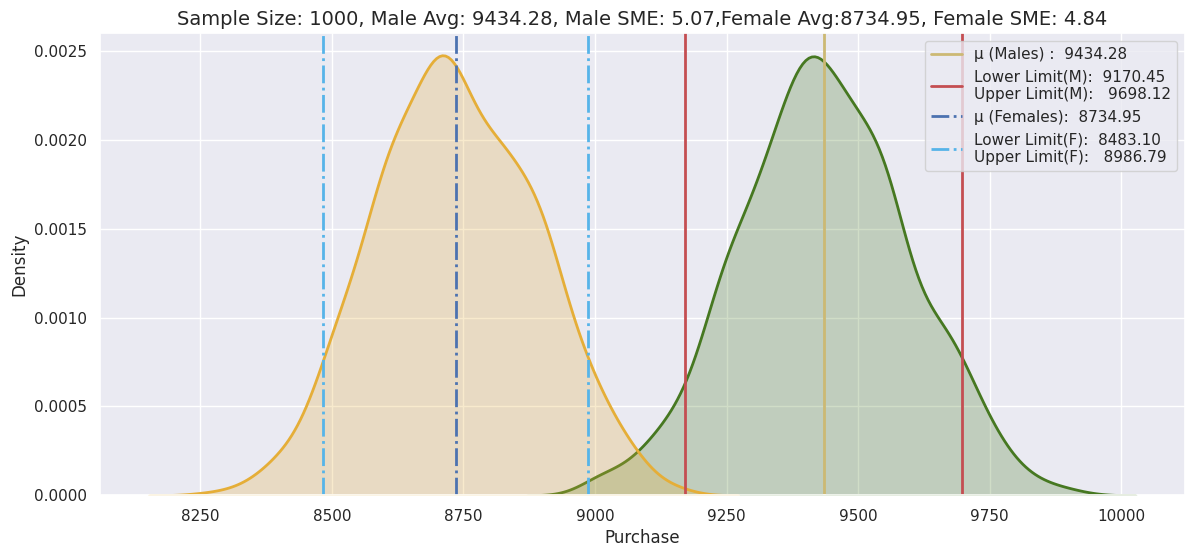

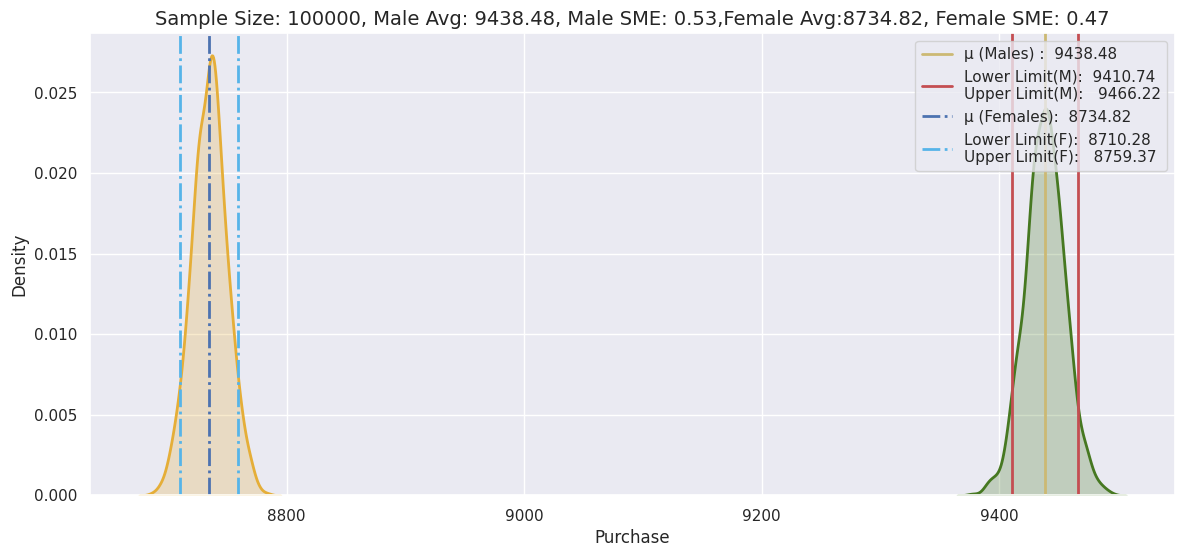

In [ ]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.90

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping(retail_data_smp_male,retail_data_smp_female,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['M', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),90]]), axis=0)
    array = np.append(array, np.array([['F', ll_f, ul_f, smp_siz, ([ll_f,ul_f]) ,(ul_f-ll_f),90]]), axis=0)

overlap = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])
print()

In [ ]:
overlap.loc[(overlap['Gender'] == 'M') & (overlap['Sample_Size'] >= 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI   Range  \
6       M     8952.43     9948.66         300  [8952.43, 9948.66]  996.23   
8       M     9170.45     9698.12        1000  [9170.45, 9698.12]  527.67   
10      M     9410.74     9466.22      100000  [9410.74, 9466.22]   55.48   

   Confidence_pct  
6              90  
8              90  
10             90

In [ ]:
overlap.loc[(overlap['Gender'] == 'F') & (overlap['Sample_Size'] >= 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI   Range  \
7       F     8287.02     9174.62         300  [8287.02, 9174.62]   887.6   
9       F      8483.1     8986.79        1000   [8483.1, 8986.79]  503.69   
11      F     8710.28     8759.37      100000  [8710.28, 8759.37]   49.09   

   Confidence_pct  
7              90  
9              90  
11             90

**Inferences**
    As the sample size increases, the two groups start to become distinct
    
    With increasing sample size, Standard error of the mean in the samples decreases.
    
    For sample size 100000 is 0.49
    
    For Female (sample size 100000) range for mean purchase with confidence interval 90% is [8645.68, 8696.14]
    
    For Male range for mean purchase with confidence interval 90% is [9341.03, 9393.94]

## CLT Analysis for mean purchase with confidence 95% - Based on Gender
    Analysis of the true mean of purchase values by gender with a 95% confidence


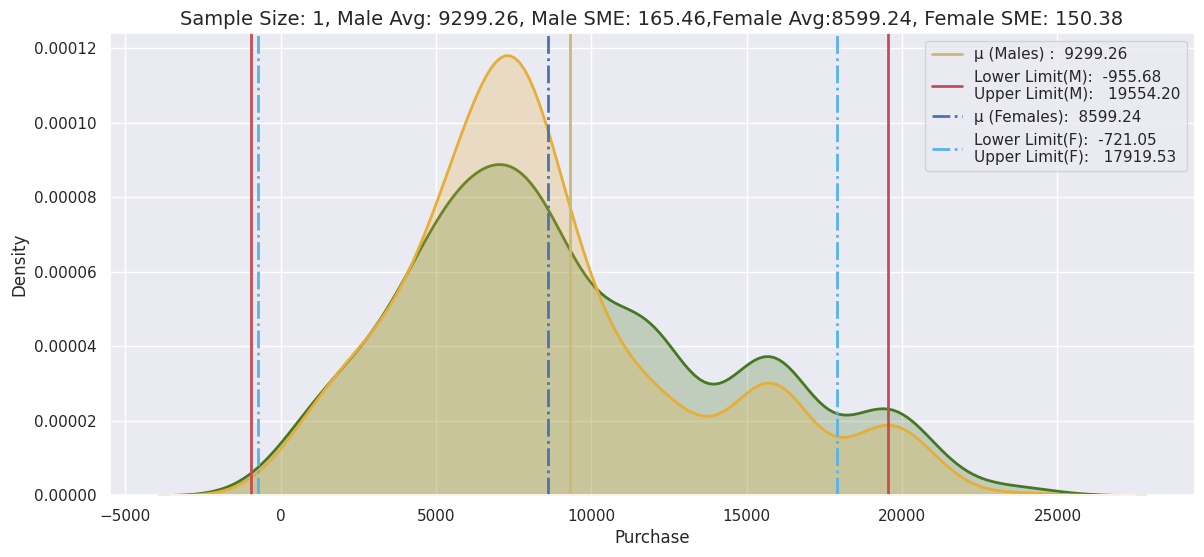

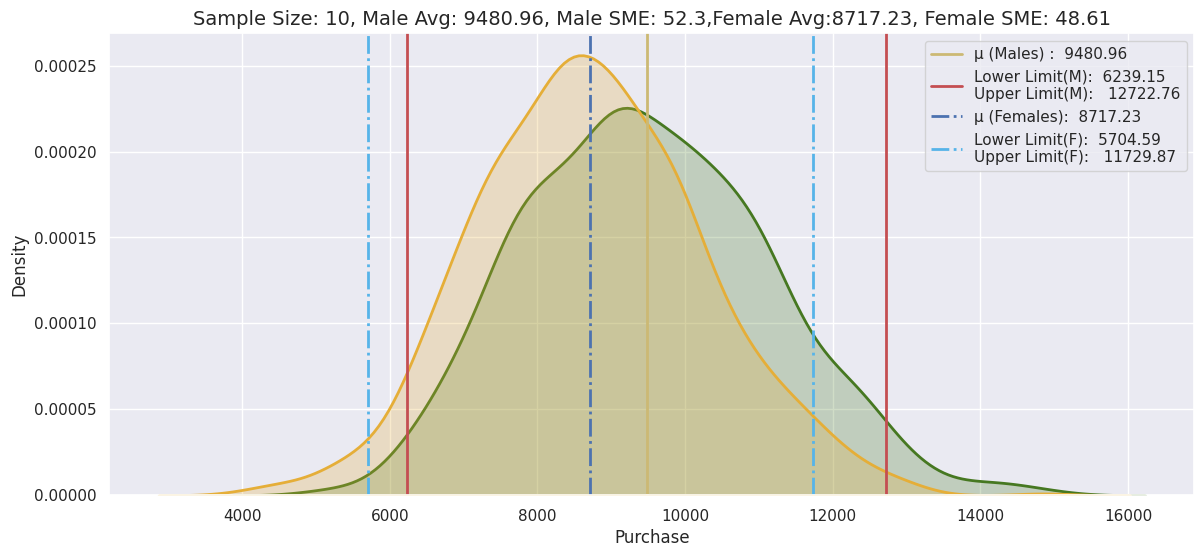

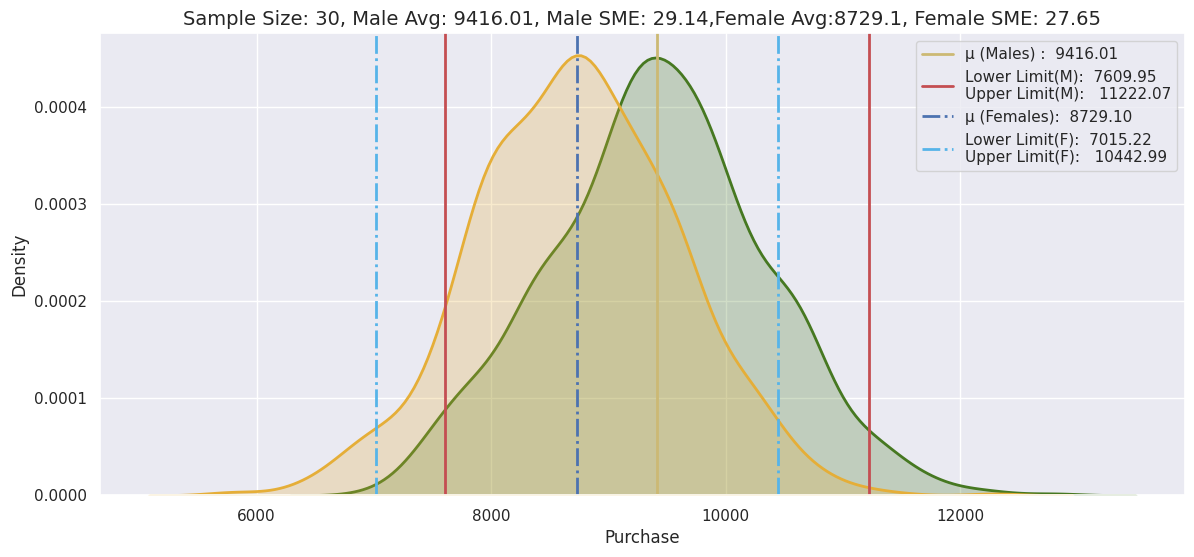

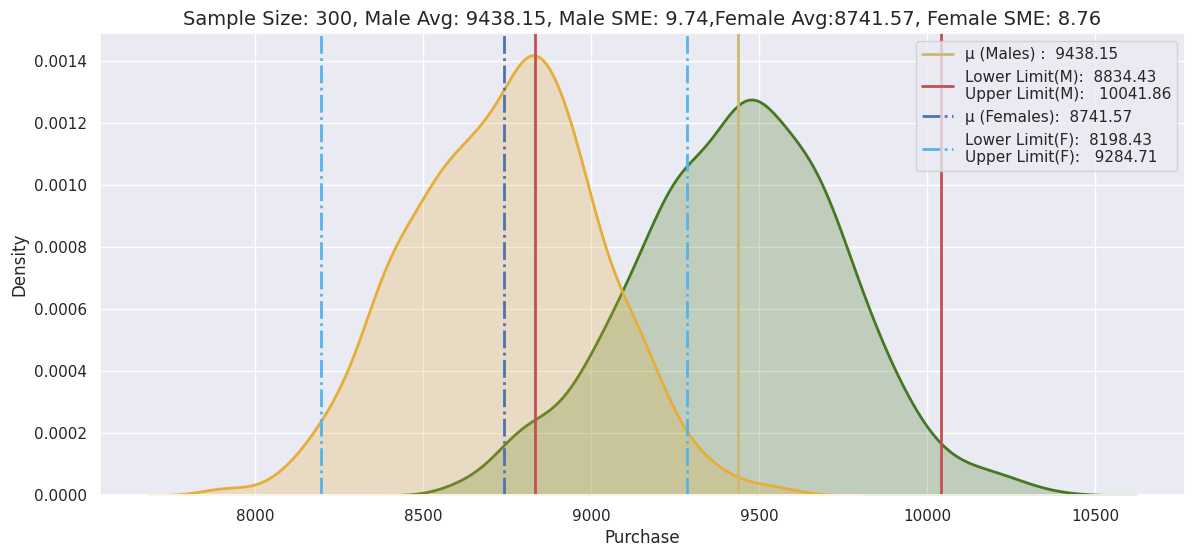

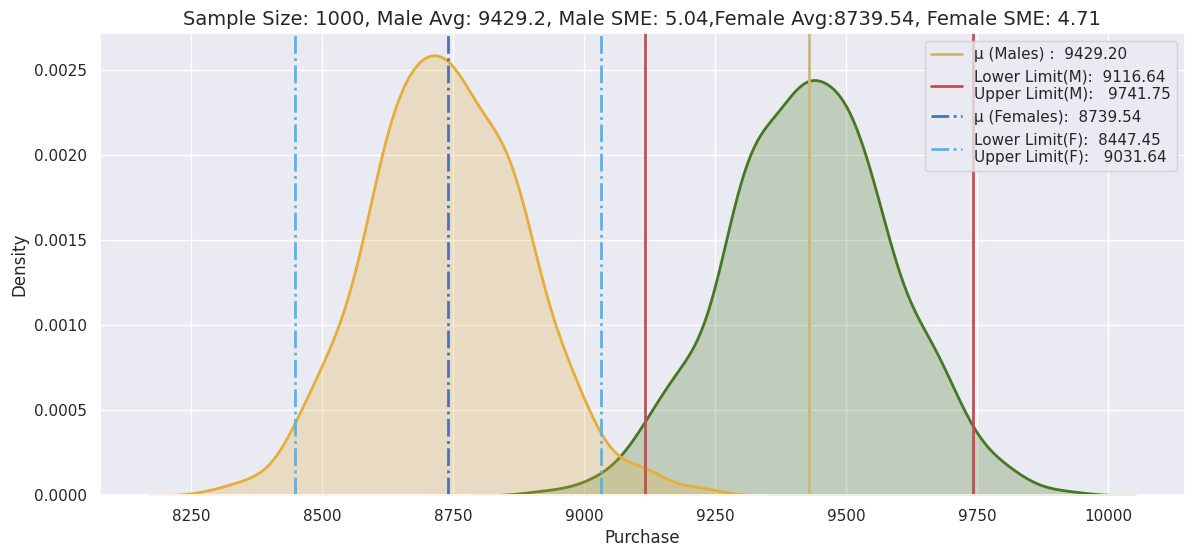

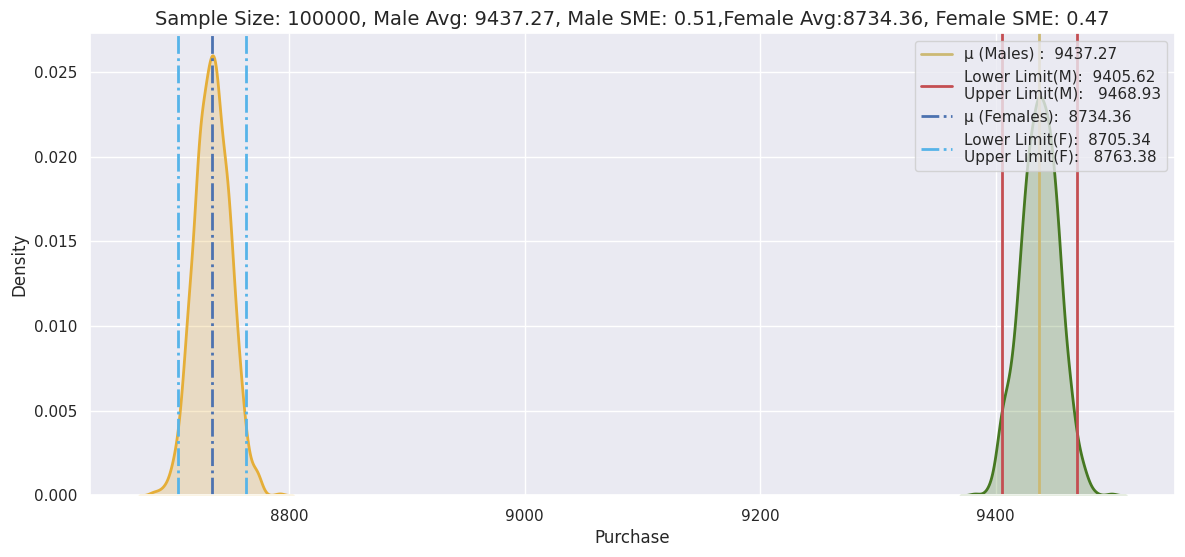

In [ ]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.95

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping(retail_data_smp_male,retail_data_smp_female,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['M', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),95]]), axis=0)
    array = np.append(array, np.array([['F', ll_f, ul_f, smp_siz, ([ll_f,ul_f]) ,(ul_f-ll_f),95]]), axis=0)

overlap_95 = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])
overlap = pd.concat([overlap, overlap_95], axis=0)

In [ ]:
overlap_95.loc[(overlap_95['Gender'] == 'M') & (overlap_95['Sample_Size'] >= 300)]


Gender Lower_limit Upper_limit Sample_Size                   CI    Range  \
6       M     8834.43    10041.86         300  [8834.43, 10041.86]  1207.43   
8       M     9116.64     9741.75        1000   [9116.64, 9741.75]   625.11   
10      M     9405.62     9468.93      100000   [9405.62, 9468.93]    63.31   

   Confidence_pct  
6              95  
8              95  
10             95

In [ ]:
overlap_95.loc[(overlap_95['Gender'] == 'F') & (overlap_95['Sample_Size'] >= 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI    Range  \
7       F     8198.43     9284.71         300  [8198.43, 9284.71]  1086.28   
9       F     8447.45     9031.64        1000  [8447.45, 9031.64]   584.19   
11      F     8705.34     8763.38      100000  [8705.34, 8763.38]    58.04   

   Confidence_pct  
7              95  
9              95  
11             95

**Inferences**

    Using confidence interval 95%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90%-
    
    As the sample size increases, the Male and female groups start to become distinct
    
    With increasing sample size, Standard error of the mean in the samples decreases. For sample size 100000 is 0.47
    
    For Female (sample size 100000) range for mean purchase with confidence interval 90% is [8642.58, 8701.58]
    
    For Male range for mean purchase with confidence interval 95% is [9336.23, 9397.53]
    
  Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

## CLT Analysis for mean purchase with confidence 99% - Based on Gender
    Analysis of the true mean of purchase values by gender with a 99% confidence.

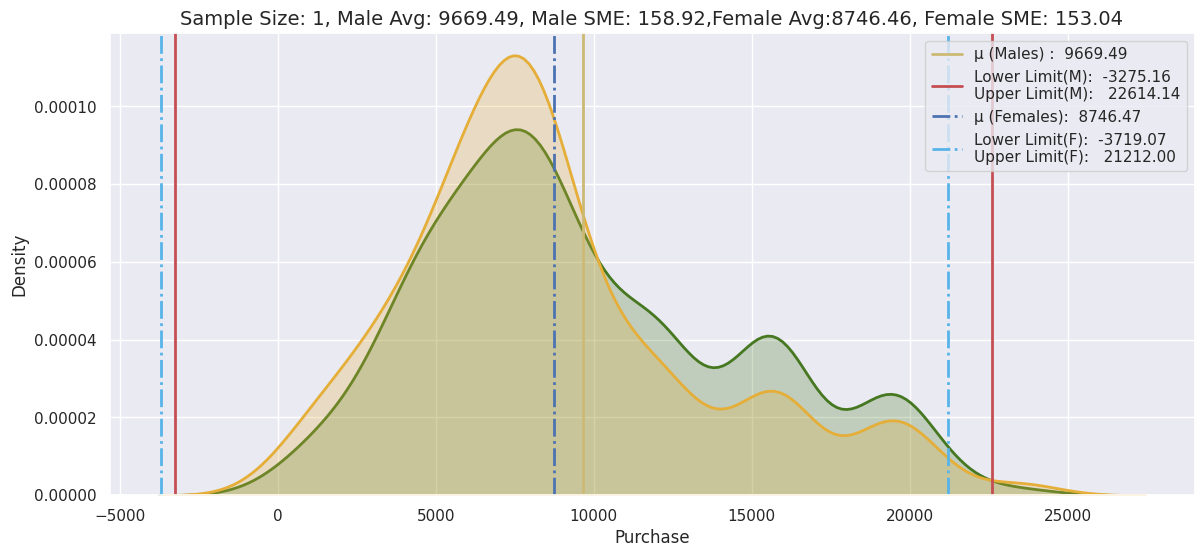

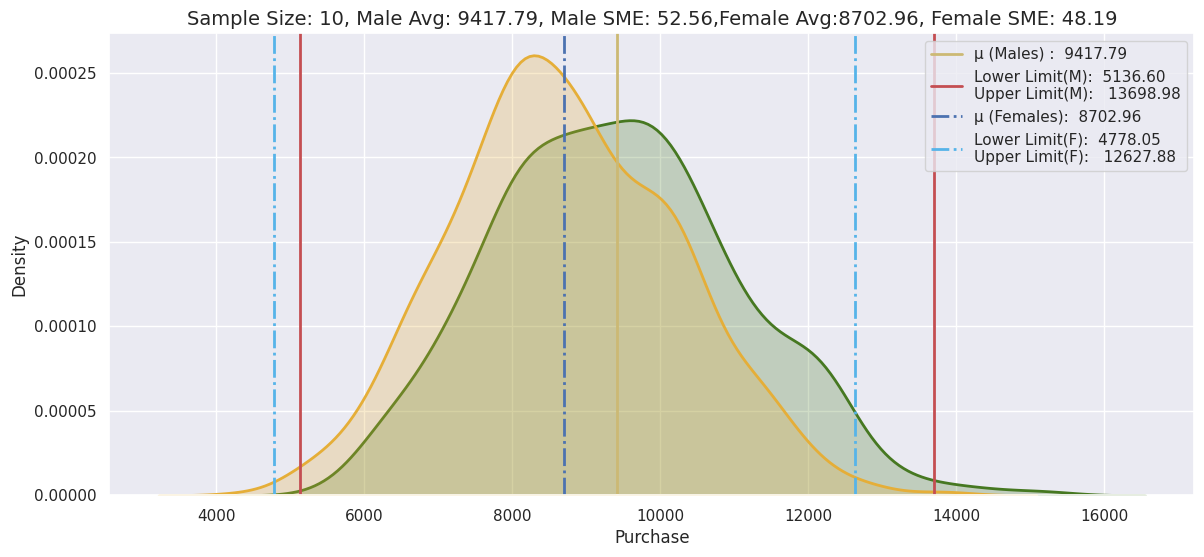

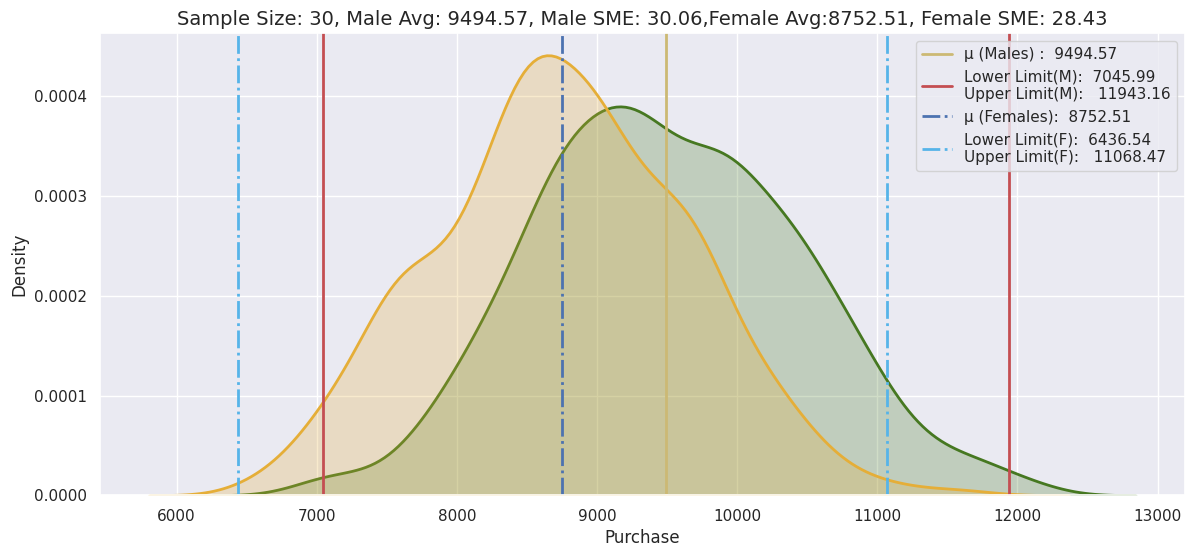

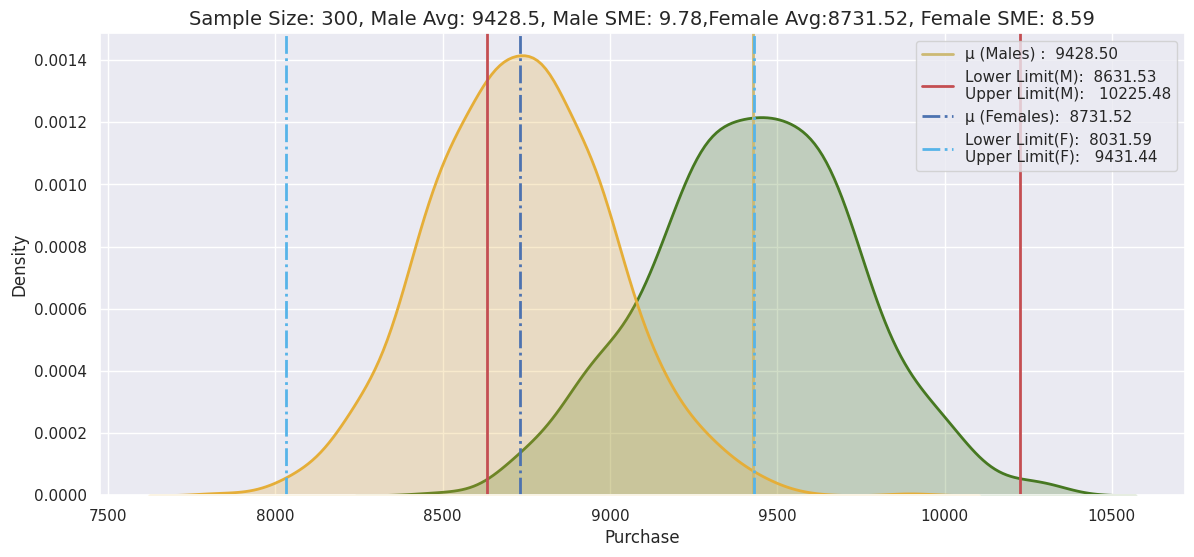

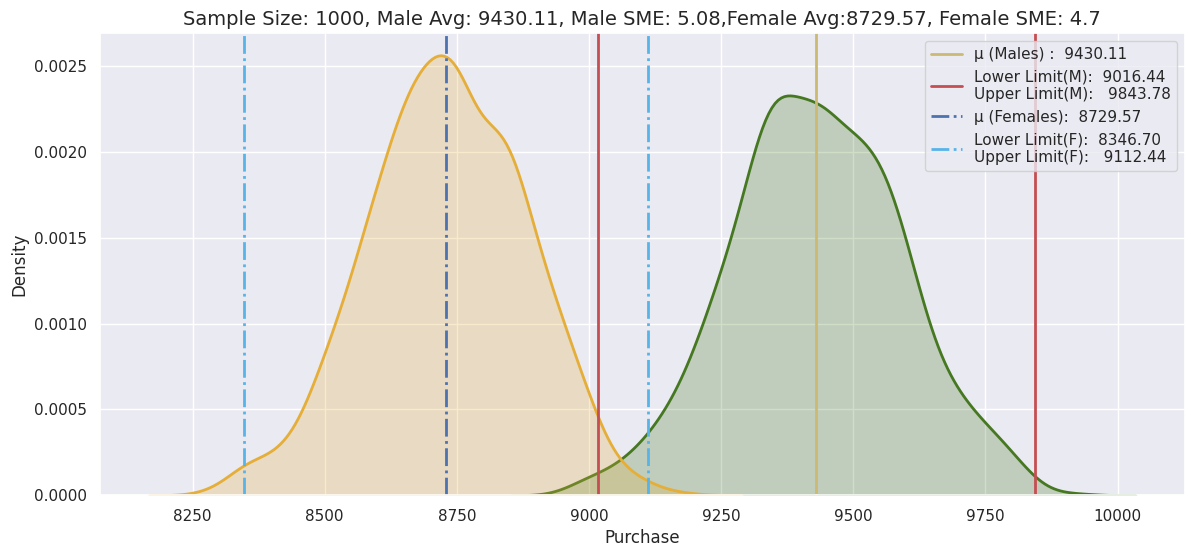

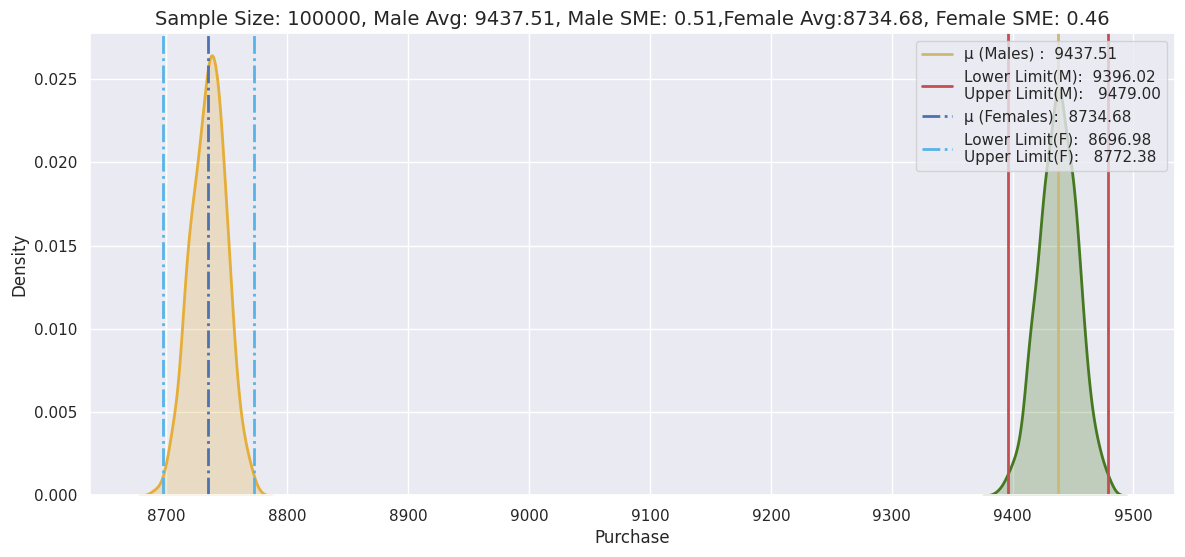

In [ ]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.99

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping(retail_data_smp_male,retail_data_smp_female,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['M', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)
    array = np.append(array, np.array([['F', ll_f, ul_f, smp_siz, ([ll_f,ul_f]) ,(ul_f-ll_f),99]]), axis=0)

overlap_99 = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])
overlap = pd.concat([overlap, overlap_99], axis=0)

In [ ]:
overlap_99.loc[(overlap_99['Gender'] == 'M') & (overlap_99['Sample_Size'] >= 300)]

Gender Lower_limit Upper_limit Sample_Size                   CI    Range  \
6       M     8631.53    10225.48         300  [8631.53, 10225.48]  1593.95   
8       M     9016.44     9843.78        1000   [9016.44, 9843.78]   827.34   
10      M     9396.02      9479.0      100000    [9396.02, 9479.0]    82.98   

   Confidence_pct  
6              99  
8              99  
10             99

In [ ]:
overlap_99.loc[(overlap_99['Gender'] == 'F') & (overlap_99['Sample_Size'] >= 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI    Range  \
7       F     8031.59     9431.44         300  [8031.59, 9431.44]  1399.85   
9       F      8346.7     9112.44        1000   [8346.7, 9112.44]   765.74   
11      F     8696.98     8772.38      100000  [8696.98, 8772.38]     75.4   

   Confidence_pct  
7              99  
9              99  
11             99

In [ ]:
overlap.loc[(overlap['Gender'] == 'M') & (overlap['Sample_Size'] >= 10000)]


Gender Lower_limit Upper_limit Sample_Size                  CI  Range  \
10      M     9410.74     9466.22      100000  [9410.74, 9466.22]  55.48   
10      M     9405.62     9468.93      100000  [9405.62, 9468.93]  63.31   
10      M     9396.02      9479.0      100000   [9396.02, 9479.0]  82.98   

   Confidence_pct  
10             90  
10             95  
10             99

In [ ]:
overlap.loc[(overlap['Gender'] == 'F') & (overlap['Sample_Size'] >= 10000)]

Gender Lower_limit Upper_limit Sample_Size                  CI  Range  \
11      F     8710.28     8759.37      100000  [8710.28, 8759.37]  49.09   
11      F     8705.34     8763.38      100000  [8705.34, 8763.38]  58.04   
11      F     8696.98     8772.38      100000  [8696.98, 8772.38]   75.4   

   Confidence_pct  
11             90  
11             95  
11             99

**Inferences**

    Using confidence interval 99%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90% & 95%-
    
    As the sample size increases, the Male and female groups start to become distinct
    
    With increasing sample size, Standard error of the mean in the samples decreases. For sample size 100000 is 0.45
    
    For Female (sample size 100000) range for mean purchase with confidence interval 99% is [8634.54, 8707.85]
    
    For Male range for mean purchase with confidence interval 90% is [9328.03, 9409.07]
    
    
  When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases. For Female Confidence percent as [90,95,99] have difference between the upper & lower limits as [50.46,59,73.31]

## Recommendations
> In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.


## Calculate Confidence Interval (CI) - to estimate the mean weight of the expenses by married and unmarried customers

## CLT Analysis for mean purchase with confidence 99% - Based on Marital Status
    Analysis of the true mean of purchase values by marital Status with a 99% confidence.

In [ ]:
retail_data_v1['Marital_Status'].replace(to_replace = 0, value = 'Unmarried', inplace = True)
retail_data_v1['Marital_Status'].replace(to_replace = 1, value = 'Married', inplace = True)

In [ ]:
retail_data_v1.sample(500,replace=True).groupby(['Marital_Status'])['Purchase'].describe()

count         mean          std    min     25%     50%  \
Marital_Status                                                           
Married         199.0  9241.623116  4471.662416  754.0  5890.0  8252.0   
Unmarried       301.0  9491.528239  5182.347381   13.0  5835.0  8145.0   

                    75%      max  
Marital_Status                    
Married         11910.5  21487.0  
Unmarried       12750.0  23599.0

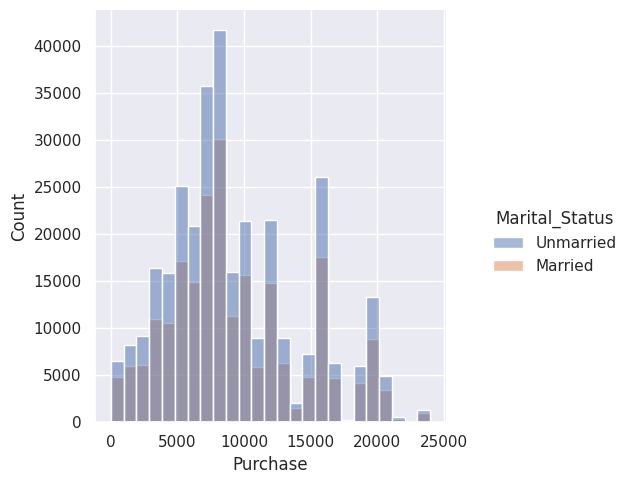

In [ ]:
sns.displot(data = retail_data_v1, x = 'Purchase', hue = 'Marital_Status',bins = 25)
plt.show()

In [ ]:
retail_data_smp_married = retail_data_v1[retail_data_v1['Marital_Status'] == 'Married']['Purchase']
retail_data_smp_unmarried = retail_data_v1[retail_data_v1['Marital_Status'] == 'Unmarried']['Purchase']

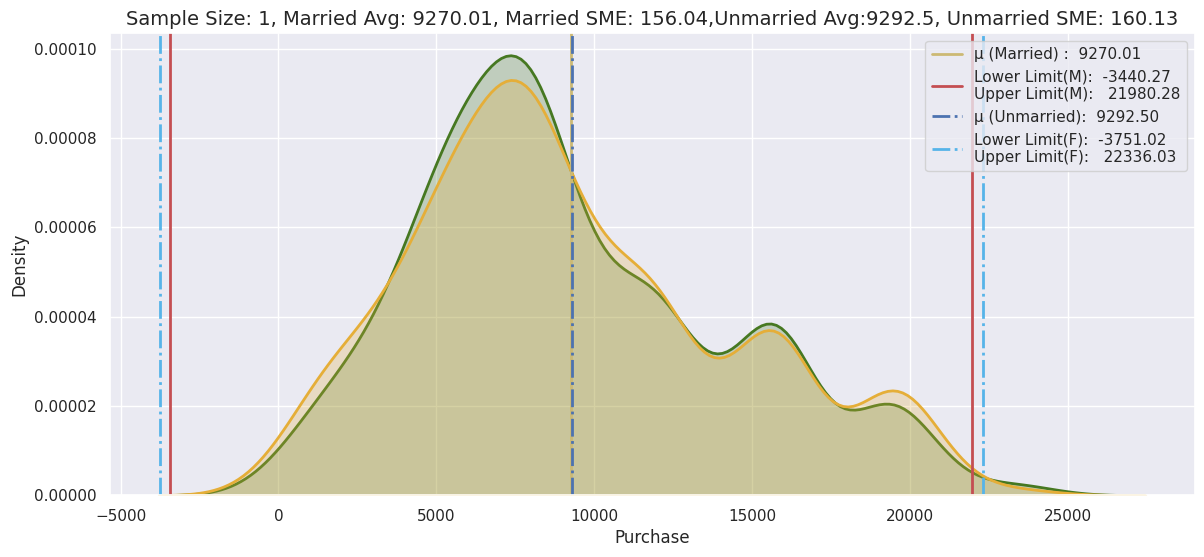

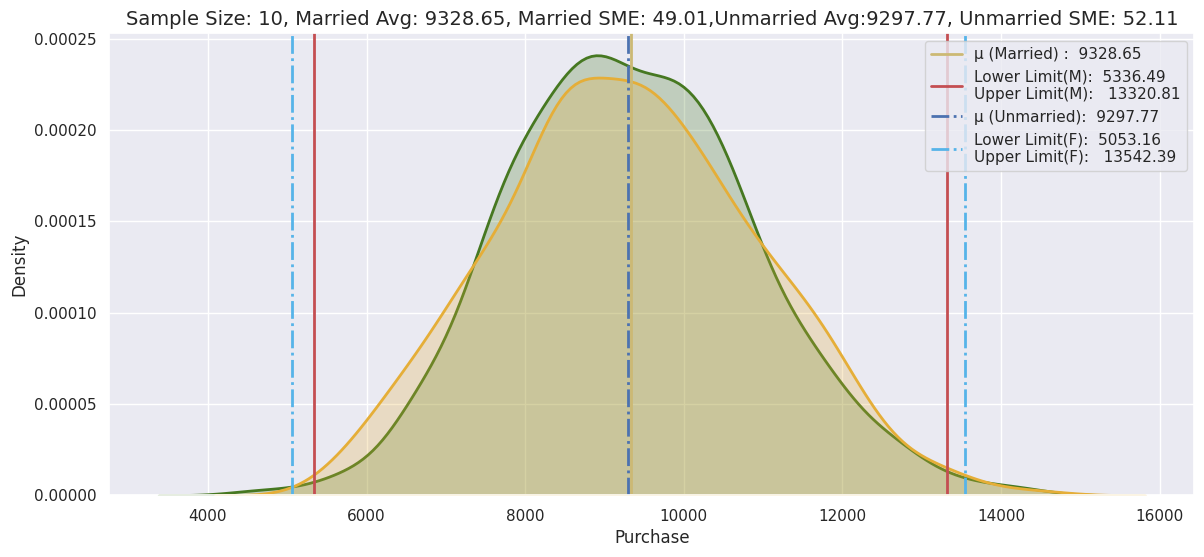

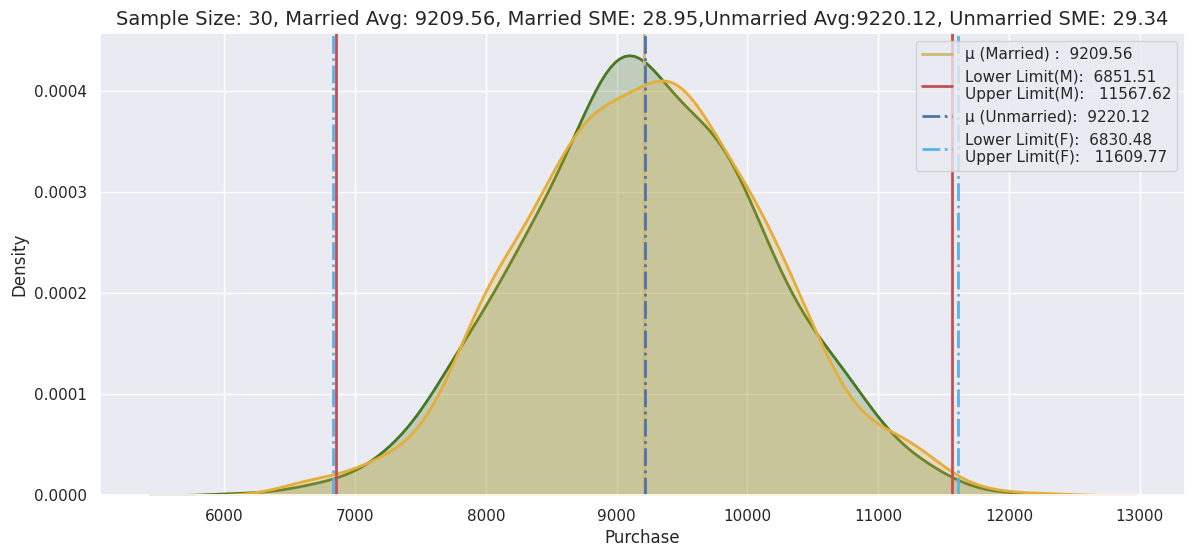

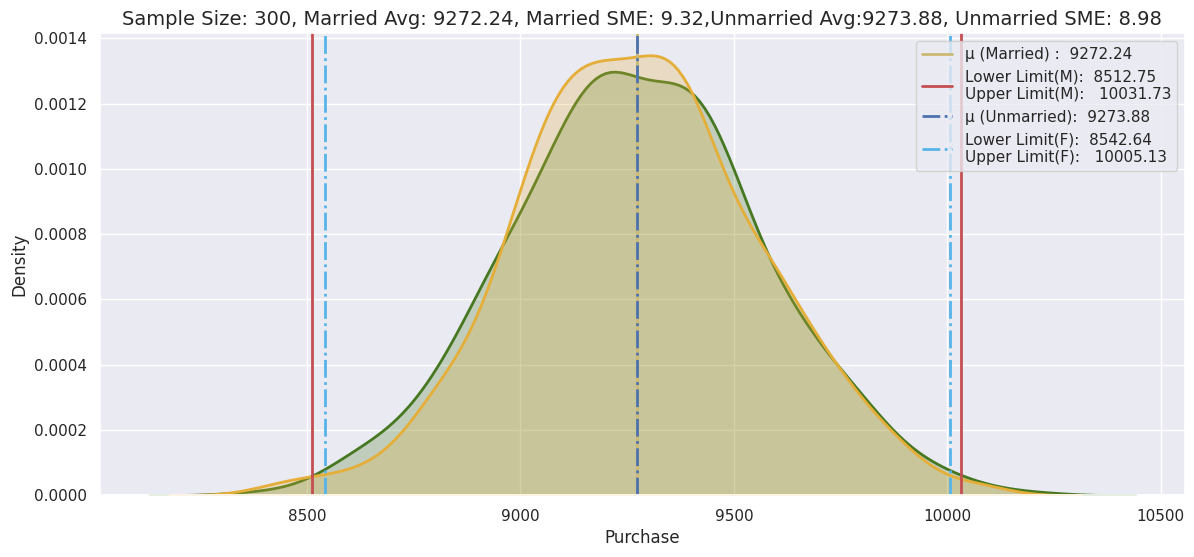

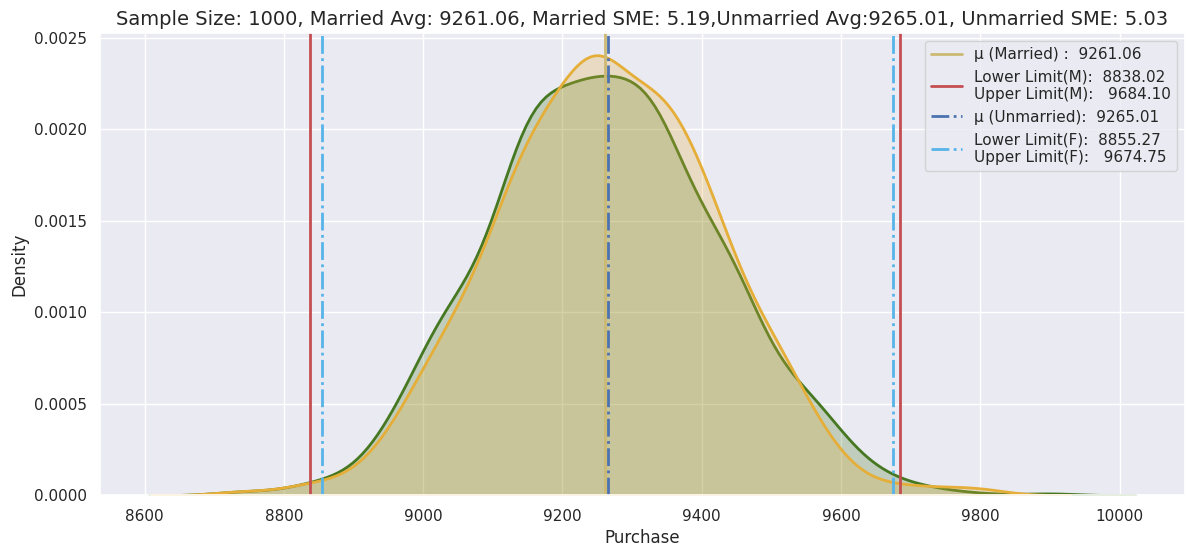

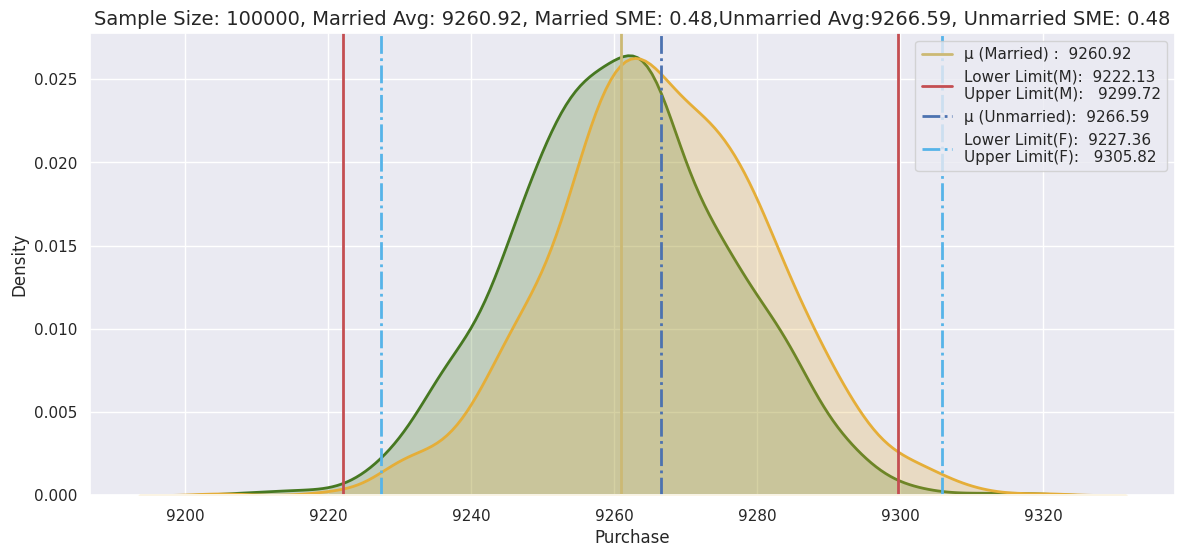

In [ ]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.99

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_u, ul_u = bootstrapping_m_vs_um(retail_data_smp_married,retail_data_smp_unmarried,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['Married', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)
    array = np.append(array, np.array([['Unmarried', ll_u, ul_u, smp_siz, ([ll_u,ul_u]) ,(ul_u-ll_u),99]]), axis=0)

overlap = pd.DataFrame(array, columns = ['Marital_Status','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [ ]:
overlap.head()

Marital_Status Lower_limit Upper_limit Sample_Size                    CI  \
0        Married    -3440.27    21980.28           1  [-3440.27, 21980.28]   
1      Unmarried    -3751.02    22336.03           1  [-3751.02, 22336.03]   
2        Married     5336.49    13320.81          10   [5336.49, 13320.81]   
3      Unmarried     5053.16    13542.39          10   [5053.16, 13542.39]   
4        Married     6851.51    11567.62          30   [6851.51, 11567.62]   

      Range Confidence_pct  
0  25420.55             99  
1  26087.05             99  
2   7984.32             99  
3   8489.23             99  
4   4716.11             99

In [ ]:
overlap.loc[(overlap['Marital_Status'] == 'Married') & (overlap['Sample_Size'] >= 300)]

Marital_Status Lower_limit Upper_limit Sample_Size                   CI  \
6         Married     8512.75    10031.73         300  [8512.75, 10031.73]   
8         Married     8838.02      9684.1        1000    [8838.02, 9684.1]   
10        Married     9222.13     9299.72      100000   [9222.13, 9299.72]   

      Range Confidence_pct  
6   1518.98             99  
8    846.08             99  
10    77.59             99

In [ ]:
overlap.loc[(overlap['Marital_Status'] == 'Unmarried') & (overlap['Sample_Size'] >= 300)]

Marital_Status Lower_limit Upper_limit Sample_Size                   CI  \
7       Unmarried     8542.64    10005.13         300  [8542.64, 10005.13]   
9       Unmarried     8855.27     9674.75        1000   [8855.27, 9674.75]   
11      Unmarried     9227.36     9305.82      100000   [9227.36, 9305.82]   

      Range Confidence_pct  
7   1462.49             99  
9    819.48             99  
11    78.46             99

**Inference**

>    Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.
    
> For Unmarried customer (sample size 100000) range for mean purchase with confidence interval 99% is [9162.0, 9241.98]
    
    
> For married customer range for mean purchase with confidence interval 90% is [9148.09, 9227.05]

## CLT Analysis for mean purchase with confidence 99% - Based on Age Group



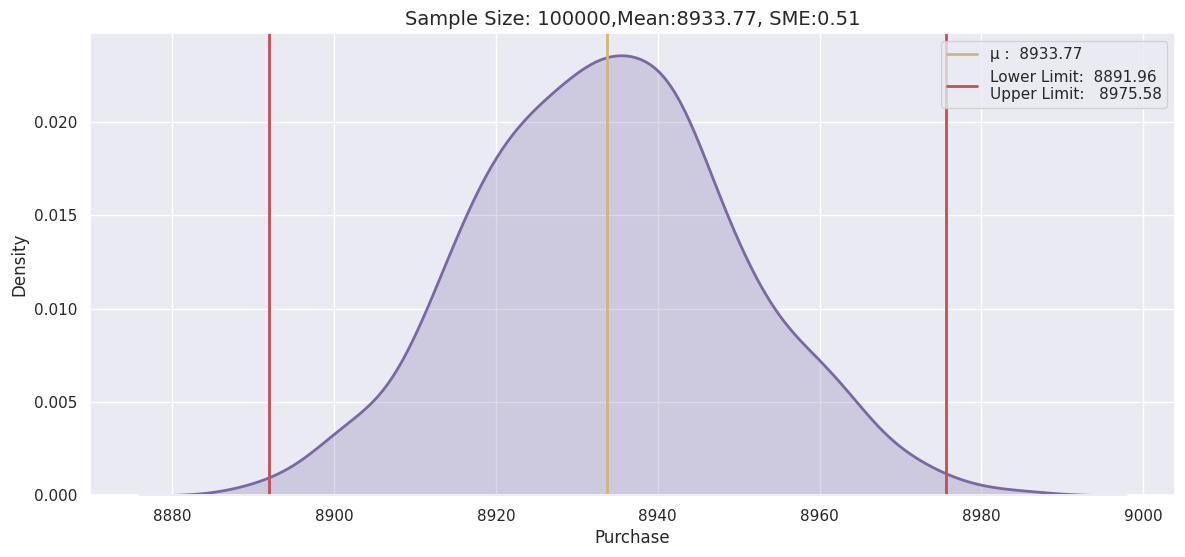

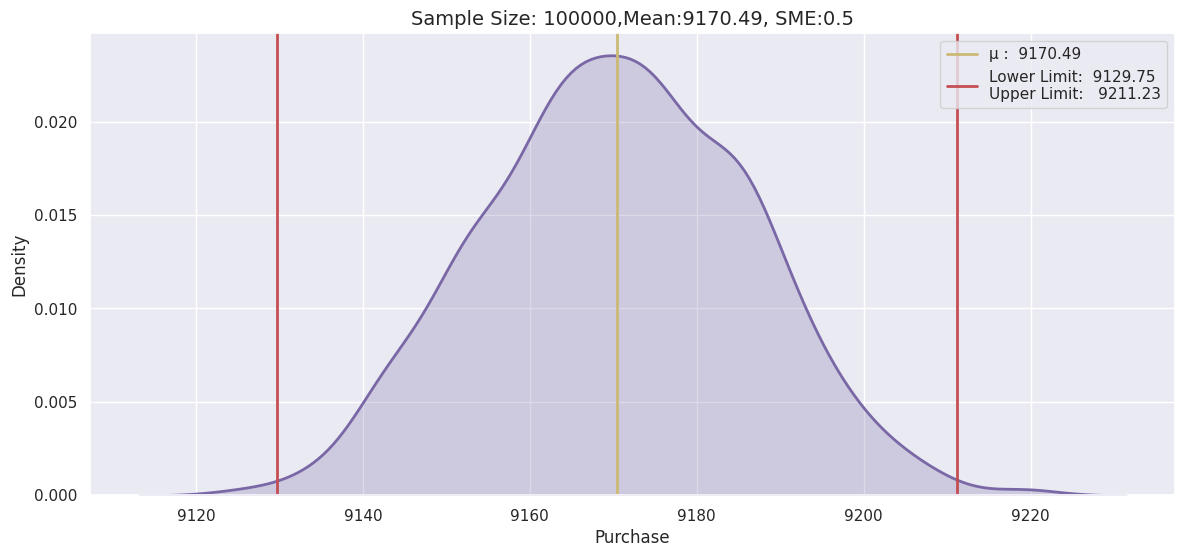

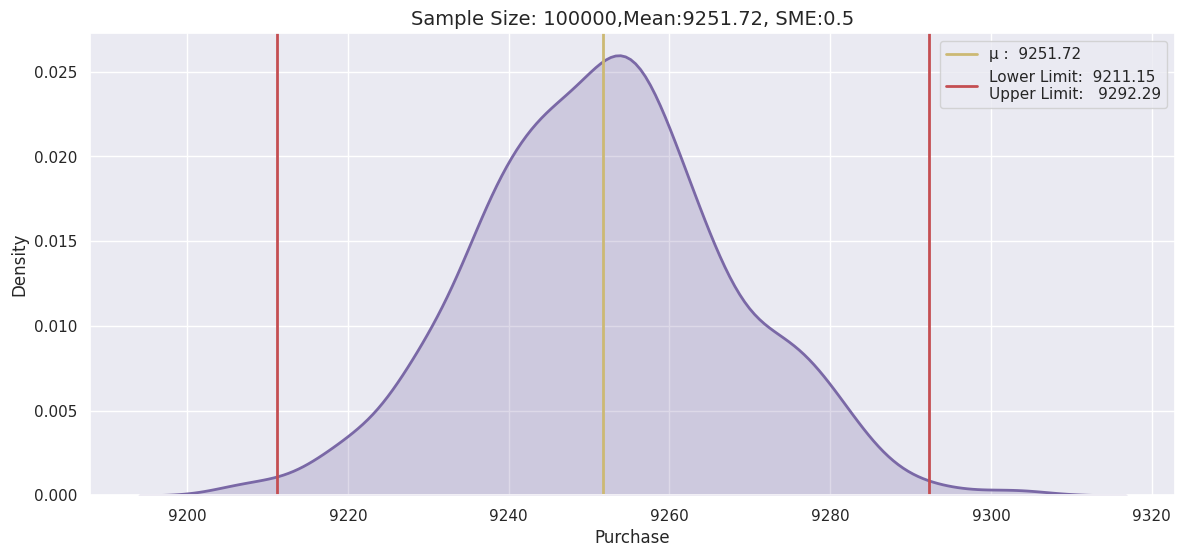

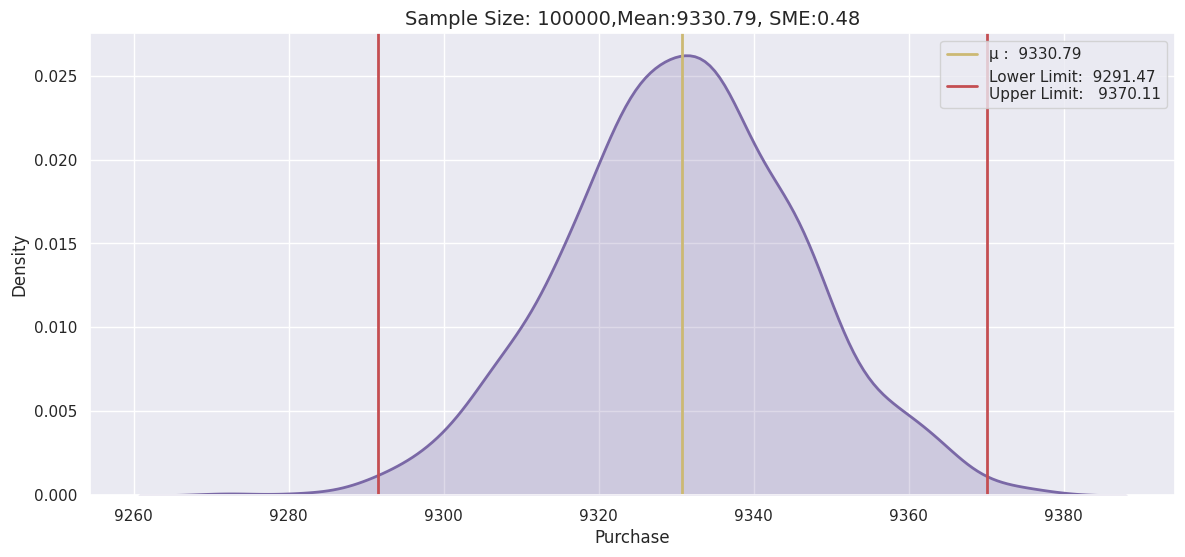

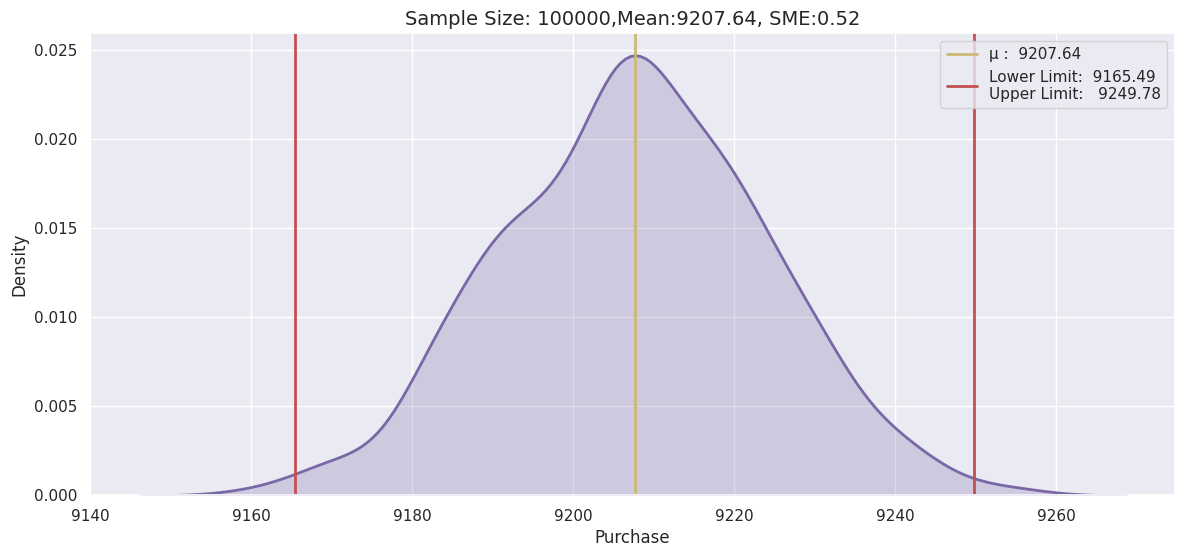

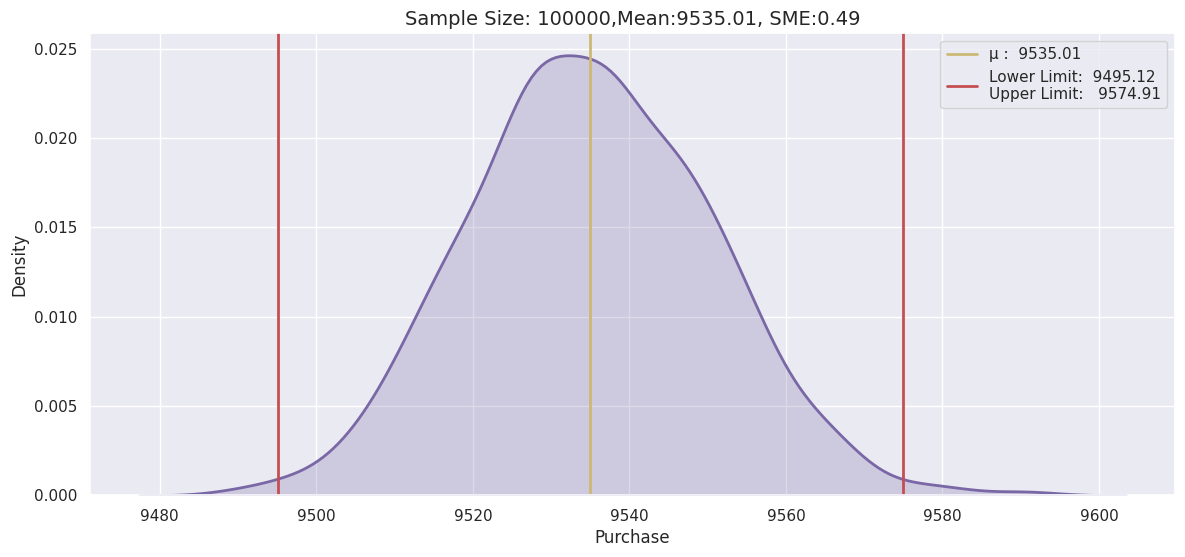

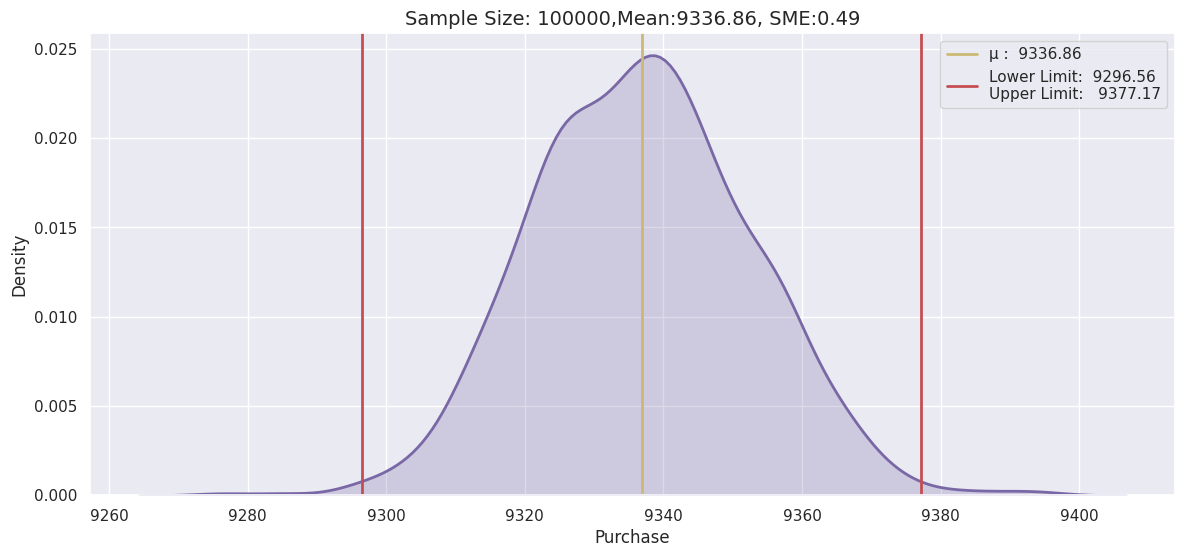

In [ ]:
itr_size = 1000
smp_size = 1000
ci = 0.99
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

array = np.empty((0,8))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(retail_data_v1[retail_data_v1['Age'] == age]['Purchase'],smp_siz,itr_size,ci)

    array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)

age_data = pd.DataFrame(array, columns = ['Age_Group','Mean','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [ ]:
age_data.head(7)

Age_Group                                               Mean Lower_limit  \
0      0-17  [8933.51, 8936.71, 8942.48, 8905.79, 8936.15, ...     8891.96   
1     18-25  [9166.0, 9174.09, 9143.57, 9165.84, 9186.51, 9...     9129.75   
2     26-35  [9241.26, 9289.69, 9247.85, 9255.42, 9284.23, ...     9211.15   
3     36-45  [9317.02, 9330.17, 9329.55, 9339.33, 9323.83, ...     9291.47   
4     46-50  [9216.76, 9220.48, 9199.23, 9200.69, 9210.48, ...     9165.49   
5     51-55  [9545.45, 9527.8, 9547.18, 9514.86, 9532.71, 9...     9495.12   
6       55+  [9329.68, 9347.14, 9325.92, 9342.9, 9318.19, 9...     9296.56   

  Upper_limit Sample_Size                  CI  Range Confidence_pct  
0     8975.58      100000  [8891.96, 8975.58]  83.62             99  
1     9211.23      100000  [9129.75, 9211.23]  81.48             99  
2     9292.29      100000  [9211.15, 9292.29]  81.14             99  
3     9370.11      100000  [9291.47, 9370.11]  78.64             99  
4     9249.78      100000  [9165.49, 9249.78]  84.29             99  
5     9574.91      100000  [9495.12, 9574.91]  79.79             99  
6     9377.17      100000  [9296.56, 9377.17]  80.61             99

## Checking the Sampling distribution of a sample mean for each Age Group

In [ ]:
age_dict = {}
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
for i in range(len(age_data)):
    age_dict[age_list[i]] = age_data.loc[i, "Mean"]

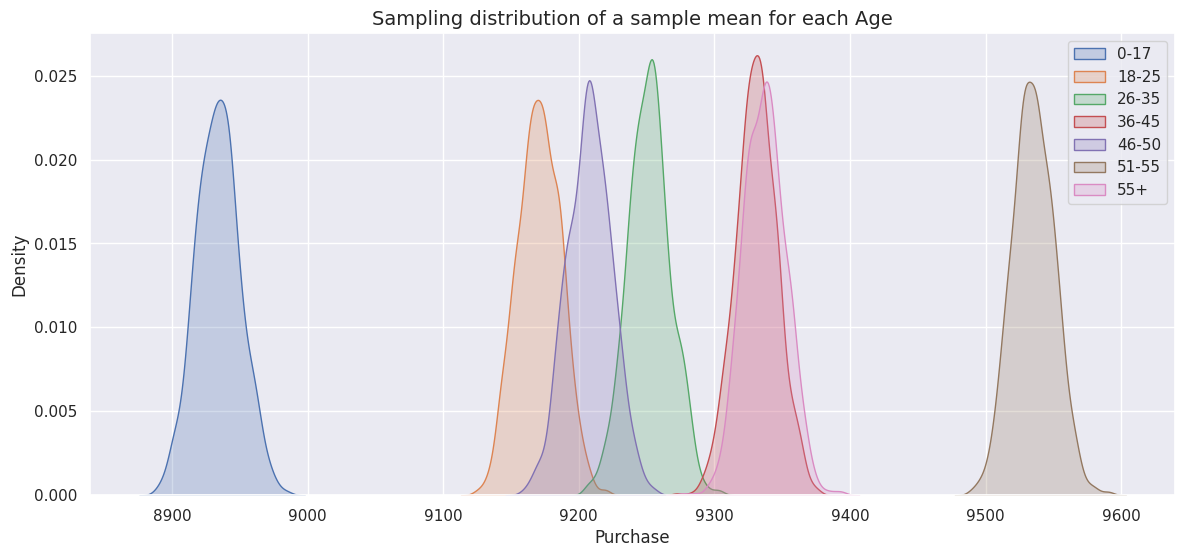

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
sns.set_style("darkgrid")
for label_val in age_dict.keys():
    sns.kdeplot(age_dict[label_val], shade = True, label = label_val)

plt.title("Sampling distribution of a sample mean for each Age",fontsize=14)
plt.xlabel('Purchase')
plt.legend(loc='upper right')

**Inferences**
    
    Spending by Age_group 0-17 is low compared to other age groups.
    
    Customers in Age_group 51-55 spend the most between 9381.9 and 9463.7

# Recommendations
>    Management should come-up with some games in the mall to attract more younger generation will can help them to increase the sale.
    
>    The management should have some offers on kids (0-17 years) in order to increase sales.
    
>    In order to attract more young shoppers, they can offer some games for the younger generation.



## Based on EDA

>    The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.
    
>    The majority of users come from City Category C, but more people from City Category B tend to purchase, which suggests the same users visit the mall multiple times in City Category B.
    
>    Majority of Customers purchase within the 5,000 - 20,000 range.
    
>    Males clearly purchase more than females. 75% of men and only 25% of women purchase products.
    
>    Most mall customers are between the ages of 26 and 35.60% of purchases are made by people between the ages of 26 and 45
    
>    City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.Purchases are high in city category C
    
>   Most mall customers are between the ages of 26 and 35.City category C has more customers between the ages of 18 and 45.
    
>    In City Category C, there are slightly more female customers.
    
>    Product 5 and 8 is common among females.

## Based on Statistical Analysis (using CLT & CI)

>    As the sample size increases, the two groups start to become distinct. With increasing sample size, Standard error of the mean in the samples decreases. For sample size 100000 is 0.49 with confidence is 90%.
    
 >   Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.
    
>    Using confidence interval 99%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90% & 95%
    
>    For Female (sample size 100000) range for mean purchase with confidence interval 99% is [8634.54, 8707.85]
    
>    For Male range for mean purchase with confidence interval 99% is [9328.03, 9409.07]
    
>    When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases. For Female Confidence percent as [90,95,99] have difference between the upper & lower limits as [50.46,59,73.31]
    
>    Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.
    
>    Spending by Age_group 0-17 is low compared to other age groups.
    
>    Customers in Age_group 51-55 spend the most between 9381.9 and 9463.7

## Actions

> In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.
    
>    Management should come-up with some games in the mall to attract more younger generation will can help them to increase the sale.
    
>    The management should have some offers on kids (0-17 years) in order to increase sales.
    
>    In order to attract more young shoppers, they can offer some games for the younger generation.

> Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.

>Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers.

>Company can focus on selling more of these products or selling more of the products which are purchased less.

>Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

>Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45

>Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the C

>City_Category C will help the company increase the revenue.
